<a href="https://colab.research.google.com/github/ViniSegatto/Salarios-Data-Science-2024/blob/main/Desafio_Universidade_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Universidade dos Dados

Neste desafio proposto pelo [Andre Yukio](https://www.linkedin.com/in/andreyukio/) no seu grupo chamado Universidade dos Dados, fomos desafiados a fazer uma (EDA, *Exploratory Data Analisys*) ou análise exploratória sobre o dataset [Salários de cientistas de dados 2024](https://www.kaggle.com/datasets/sazidthe1/data-science-salaries/data) disponivel no plataforma do  [Kaggle](https://www.kaggle.com/).

Criaremos uma análise exploratória onde possamos tirar insights sobre os como a area de dados vem evoluindo com o passar dos anos, quais as melhores areas,paises e muito mais. Criaremos graficos para aprimorar a visualização das informações contidas nos dados, permitindo-nos extrair insights significativos e aprofundados. Com o objetivo de que fique clara a tendencia do mercado de trabalho nessa area que é tão dinamica. Seu envolvimento, feedback e apoio são muito importantes para mim. Vamos juntos descobrir o que esse mercado fascinante sobre o mundo da ciência de dados tem a nos mostrar!



#Sobre o Dataset

Esse DataSet sobre os salarios das mais diversas areas de Ciência de Dados, busca nos mostrar as tendências e padrões na area que são cruciais para profissionais iniciantes até os mais avançados, e empresas. Este dataset busca analisar os salarios das areas de dados entre os anos de 2020 a 2024. A analise destes dados são de grande valor tanto para profissionais na area, entusiastas e industrias, que todos podem ter insights sobre valores, variaveis regionais e muito mais.

#Conteudo e estrutura do Dataset

Este conjunto de dados contem dados de algumas areas quem englobam a Ciência de Dados dos ultimos cinco anos de 2020 a 2024, este dataset contem as seguintes colunas abaixo:

**job_title**:          Cargo ou função.

**experience_level**:   Nivel de experiencia do trabalhador.

**employment_type**:    Modelo de empregabilidade (tempo integral, meio periodo, etc).

**work_models**:        Modelo de trabalho, Remoto, Hibrido ou presencial.

**work_year**:          Ano expecifico em que o salario foi registrado.

**employee_residence**: Local de residencia do empregado.

**salary**:             Remunereção em cotação original.

**salary_currency**:    Moeda do pais em que o funcionario atua (BRL, USD,...).

**salary_in_usd**:      Remuneração convertida em Dolares Americanos (USD).

**company_location**:   Localização geografica da empresa.

**company_size**:       O tamanho da empresa considerando seu numero de funcionarios.


Como decidi fazer essa analise no Google Collab por razões de performance, para isso precisamos começar chamando essa primeira celula para que possamos importar os datasets que serão usados nessa nossa analise.

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'data-science-salaries:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4308460%2F7442598%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240304%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240304T154154Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8e7034724546ccb6c9b368a3214aaa2f6940b2ef31b0e3a71c66af6171b69e66563a4366f9f9b7b4b34378df1c81384627bfcc19e28d91ede3f0abcf63cdae88f1d51c42914143e37735b61c5d21f95f4fd18d5216cde22bb9df1f3a225e2187e8bc10b401b48b7f08b51479dc35d44868817c56e7f0dcfd610022847fec8f212423d937f9cb24da05c6894d79f167b04152036337f9d5e766a08289492e662a1ef4cee4f99efdb59da7693a9a70e38f6c1244698ab9de8e1ed92ea54d8c0ac368aa181d029a4a7ec5b6ece9be06cad9cb02bbe12ab1f85c6c28b085d5aeb53efbdc132b0c5e3e1a6a4f1a9ee47970298a52ccb212aba24dfcc8cc7effa52146,data-science-job-postings-and-skills:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4407481%2F7571018%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240304%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240304T154154Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D09cf98706d28b8cc773234896e375e1a8ceab2f79e627d16e11b08fd50085bc46a227ce5b9d1a3242b8257862f17e668a311f76ba95b280527e99ae12784af31aa3cf4153ed4235dc332efd385df06d29fa21c8a8160d56932fe42e8a5b3699d45db889165355532a7abe885cf814beafd219c677ceeb88ef6647e4f3b381a2a7b40ae85178ad9028400f478c6b2e7cc717b49cae1686de963b87872562b1ab629adc7b9c89a75923078afa6e0a9698032c0420f123f0264162b39a1b3c3f9dff98a7d3a8837754faf38c5880fe35d7c5dfb1d47fd1b4a48f608bf7c570f0d3ff926486e6b38275f1255f2e9186ba67b7331639de465b0337cc73e9a1c27b111'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 58670 bytes downloaded
Downloaded and uncompressed: data-science-salaries
[==================================================] 20326056 bytes downloaded
Downloaded and uncompressed: data-science-job-postings-and-skills
Data source import complete.


Após recebermos a mensagem de que os dados foram importados. Iniciaremos a análise importando as bibliotecas essenciais para nosso projeto. Essas ferramentas desempenham um papel fundamental no desenvolvimento da análise exploratória, fornecendo as funcionalidades necessárias para extrair insights significativos dos dados.

In [2]:
import numpy as np
import pandas as pd
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1.   NumPy é uma biblioteca fundamental para Ciência de Dados em Python.
Ela fornece suporte para arrays multidimensionais e funções matemáticas para operações eficientes nesses arrays.
Muitas outras bibliotecas, incluindo pandas, dependem do NumPy para operações numéricas eficientes.

2.   Pandas é uma das biblioteca mais poderosa e conhecidas para manipulação e análise de dados em Python. Oferecendo estruturas de dados flexíveis, como DataFrame e Series, que facilitam a manipulação e análise de conjuntos de dados tabulares.

3.   A biblioteca statistics fornece funções estatísticas básicas, como média, mediana, e moda.

4.   Matplotlib é uma biblioteca de visualização que permite criar gráficos e visualizações estáticas em Python.

5.   Seaborn é uma biblioteca de visualização de dados baseada no Matplotlib.
Ela simplifica a criação de visualizações atraentes e informativas, com menos código

6.   Warnings é uma biblioteca que permite controlar as mensagens de aviso no Python.
Neste caso, estou filtrando (ignorando) todos os warnings para evitar que apareçam no output e fique muita poluição.




#1 Primeiros passos.
Agora com as bibliotecas devidamente importadas, podemos começar a nossa analise para que possamos ver as colunas e os dados que as mesmas possuem para dar inicio a nossa analise.

In [3]:
df = pd.read_csv('/kaggle/input/data-science-salaries/data_science_salaries.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [4]:
df.tail(5)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large
6598,Data Scientist,Senior-level,Full-time,On-site,2020,Austria,80000,EUR,91237,Austria,Small


Usar df.head() e df.tail() em uma Análise Exploratória de Dados (EDA) nos permite visualizar rapidamente as primeiras e últimas linhas do DataFrame, fornecendo uma visão inicial dos dados, facilitando a compreensão da estrutura, identificação de padrões e decisões.

In [5]:
# Verificar se há algum valor nulo no DATA-FRAME
print(df.isnull().sum(), end='\n\n')

# Ver quais os tipos de dados
print(df.dtypes, end='\n\n')

# Ver o tamanho do DATA-FRAME
print(df.shape)

# Descreve o DATA-FRAME
display(df.describe().round(2))

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

(6599, 11)


,work_year,salary,salary_in_usd
count,6599.00,6599.00,6599.00
mean,2022.82,179283.26,145560.56
std,0.67,526372.24,70946.84
min,2020.00,14000.00,15000.00
25%,2023.00,96000.00,95000.00
50%,2023.00,140000.00,138666.00
75%,2023.00,187500.00,185000.00
max,2024.00,30400000.00,750000.00


Como podemos observar nos dados acima, podemos garantir de que não há nenhuma coluna com valor nulo em alguma linha, o que nos garante que não iremos precisar analisar mais a fundo essa parte, pois valores nulos atrapalham nossas analises, então se houvesse algum valor nulo teriamos que analisar para ver qual seria o melhor caminho para consertar isso.

Já a segunda tabela podemos ver qualis os tipos de dados em cada coluna, isso nos ajuda para sabermos se são dados numericos inteiros (INT), ou com ponto flutuante, por exemplo 20.5 conhecidos como (Float) ou do tipo (object) que significa que a coluna contém valores de texto, strings ou outros tipos de objetos não numéricos.

O valor que aparece antes da ultima tabela, o valor (6599, 11) mostra o numero de (linhas, colunas) que o dataset possui, no caso 6599 linhas em 11 colunas diferentes.

O método df.describe() em pandas é usado para gerar estatísticas descritivas de um DataFrame. Ele fornece várias estatísticas resumidas para cada coluna numérica no DataFrame, incluindo contagem de valores, média, desvio padrão, mínimo, quartis (25%, 50%, 75%) e máximo.

In [6]:
df.keys()

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

Em pandas, df.keys() e df.columns geralmente fornecem informações semelhantes, assim como acontece com esse dataset, mas podem existem algumas diferenças sutis.

Tipo de Objeto Retornado:

df.keys(): Retorna uma visão (view) dos rótulos das colunas como um objeto do tipo pandas.core.indexes.base.Index.
df.columns: Retorna um objeto do tipo pandas.core.indexes.base.Index representando os rótulos das colunas.

df.keys() é uma função, enquanto df.columns é um atributo.
Ambas as opções são usadas para obter os rótulos das colunas de um DataFrame. Em muitos casos, são inperceptiveis.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


df.info() é um método da biblioteca **pandas** usado para fornecer informações concisas sobre um DataFrame. Ele exibe várias informações úteis, incluindo:

Número de Entradas (Linhas): Mostra o número de linhas no DataFrame, como nesse dataset (**6599 entries, 0 to 6598**)

Número de Colunas: Indica o número de colunas no DataFrame. Data columns (**total 11 columns**).

Nomes das Colunas: Lista os nomes das colunas.

Número de Valores Não Nulos: Apresenta a quantidade de valores não nulos em cada coluna. (**6599 non-null**)

Tipo de Dados das Colunas: Indica o tipo de dados (**int64, object**) em cada coluna. e **dtypes: int64(3), object(8)** no final.

Uso de Memória: Informa a quantidade de memória RAM utilizada pelo DataFrame. **memory usage: 567.2+ KB**.

Ao usar df.info(), podemos rapidamente entender a estrutura geral do DataFrame, identificar potenciais problemas de dados ausentes e ter uma visão geral dos tipos de dados em cada coluna. É uma ferramenta muito valiosa para a análise inicial de conjuntos de dados.

In [9]:
df.nunique().sort_values(ascending=False).to_frame().T

,salary_in_usd,salary,job_title,employee_residence,company_location,salary_currency,work_year,experience_level,employment_type,work_models,company_size
0,2147,1833,132,87,75,22,5,4,4,3,3


Usamos a linha acima para criar um resumo tabular das contagens de valores únicos em cada coluna, ordenado pela coluna com o maior número de valores únicos. Isso é útil para identificar rapidamente quais colunas têm uma grande variedade de valores diferentes. Como por exemplo a coluna *company_size* termos a certeza de que possui apenas os tres tamanhos de empresa, enquando na coluna salario em dolares temos mais de 2000 tipos de entrada diferentes, o que precisamos levar em consideração para futuras analises e possiveis modelos.

#1.1

In [10]:
for k in df.keys():
    if "int64" in str(df[k].dtype):
        print(k,df[k].dtype,df[k].min(),df[k].max())

work_year int64 2020 2024
salary int64 14000 30400000
salary_in_usd int64 15000 750000


Este código acima passa por todas as colunas do DataFrame df e verifica se o tipo de dado (dtype) da coluna é int64. Se a condição for atendida, ele imprime o nome da coluna, o tipo de dado, o valor mínimo e o valor máximo dessa coluna. O código está extraindo informações estatísticas básicas para colunas que contêm dados inteiros. Isso pode ser útil para entender a faixa de valores e identificar possíveis problemas nos dados, como outliers.

In [11]:
df.nlargest(10,'salary_in_usd')

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
296,Machine Learning Scientist,Mid-level,Full-time,On-site,2024,United States,750000,USD,750000,United States,Medium
848,Machine Learning Scientist,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
852,Machine Learning Engineer,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
1540,Data Engineer,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
1611,Data Scientist,Senior-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
321,Research Engineer,Mid-level,Full-time,On-site,2024,United States,720000,USD,720000,United States,Medium
329,Research Scientist,Mid-level,Full-time,On-site,2024,United States,720000,USD,720000,United States,Medium
1095,Analytics Engineer,Senior-level,Full-time,Remote,2023,United States,700000,USD,700000,United States,Medium
1509,Analytics Engineer,Mid-level,Full-time,Remote,2023,United States,700000,USD,700000,United States,Medium
1354,Data Engineer,Executive-level,Full-time,On-site,2023,United States,465000,USD,465000,United States,Medium


In [12]:
df.nsmallest(10,'salary_in_usd')

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6101,Data Analyst,Entry-level,Full-time,On-site,2022,Indonesia,15000,USD,15000,Indonesia,Large
6111,Business Intelligence Developer,Mid-level,Full-time,Remote,2022,Ghana,15000,USD,15000,Ghana,Medium
6408,Machine Learning Developer,Entry-level,Full-time,Remote,2021,Thailand,15000,USD,15000,Thailand,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
4499,Data Analyst,Mid-level,Full-time,Hybrid,2023,Philippines,866000,PHP,15680,Philippines,Large
4566,Data Analyst,Senior-level,Full-time,Remote,2023,India,1300000,INR,15809,India,Small
6086,Computer Vision Engineer,Mid-level,Full-time,Remote,2022,India,1250000,INR,15897,India,Medium
6590,ML Engineer,Entry-level,Part-time,Remote,2020,Germany,14000,EUR,15966,Germany,Small
4946,Data Scientist,Entry-level,Full-time,Remote,2023,Ecuador,16000,USD,16000,Ecuador,Large
6445,Big Data Engineer,Entry-level,Full-time,Remote,2021,India,1200000,INR,16228,India,Large


Nas Duas linhas de cogido acima podemos ver os 10 maiores e os 10 menores salarios em (USD) respectivamente.
Isso é útil para identificar os maiores salários em um conjunto de dados, ajudando a entender a distribuição dos salários e identificar eventuais outliers.Tambem é útil para identificar os menores salários no conjunto de dados, fornecendo insights sobre a distribuição dos salários nas extremidades inferiores.

Ambos os métodos ajudam a obter uma visão rápida das extremidades superior e inferior da distribuição dos dados, o que pode ser útil para identificar padrões, outliers ou discrepâncias nos salários.

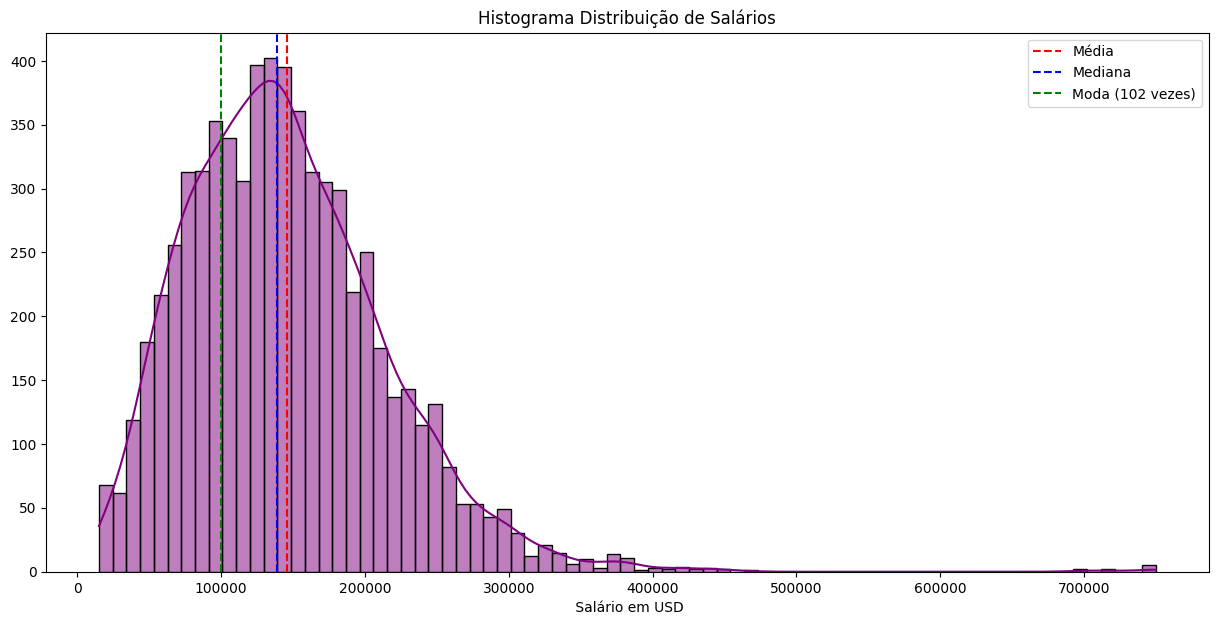

In [13]:
from scipy.stats import mode

# Configurar o gráfico
fig, _ = plt.subplots(figsize=(15, 7))

# Histograma com KDE
sns.histplot(data=df, x='salary_in_usd', kde=True, color='purple')

# Adicionar linhas para média, mediana
plt.axvline(df['salary_in_usd'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['salary_in_usd'].median(), color='blue', linestyle='--', label='Mediana')

# Calcular a moda
mode_result = mode(df['salary_in_usd'])
mode_salary = mode_result.mode
mode_count = mode_result.count

# Adicionar linha para a moda
plt.axvline(mode_salary, color='green', linestyle='--', label=f'Moda ({mode_count} vezes)')

plt.xlabel(' Salário em USD')
plt.ylabel('')
plt.title('Histograma Distribuição de Salários')
plt.legend()
plt.show()

Esse histograma acima representa a distribuição dos salários no nosso conjunto de dados, com algumas métricas estatísticas adicionadas para ilustrar tendências centrais.

**Eixo x (horizontal)**: Representa os valores dos salários em USD.

**Eixo y (vertical)**: Indica a frequência (número de ocorrências) dos salários.
O gráfico tem três linhas verticais adicionadas:

1.   **Média** (linha vermelha tracejada): Indica o valor médio dos salários.
2.   **Mediana** (linha azul tracejada): Representa o valor que está no meio da distribuição.
3.   **Moda** (linha verde tracejada): Indica o valor mais frequente nos salários, com a contagem de quantas vezes a moda ocorre.

O KDE (Kernel Density Estimate) em roxo por trás do histograma é uma estimativa da função de densidade de probabilidade, proporcionando uma visão suavizada da distribuição. Essas linhas e o KDE ajudam a compreender a forma e as características da distribuição dos salários no conjunto de dados.

#1.2

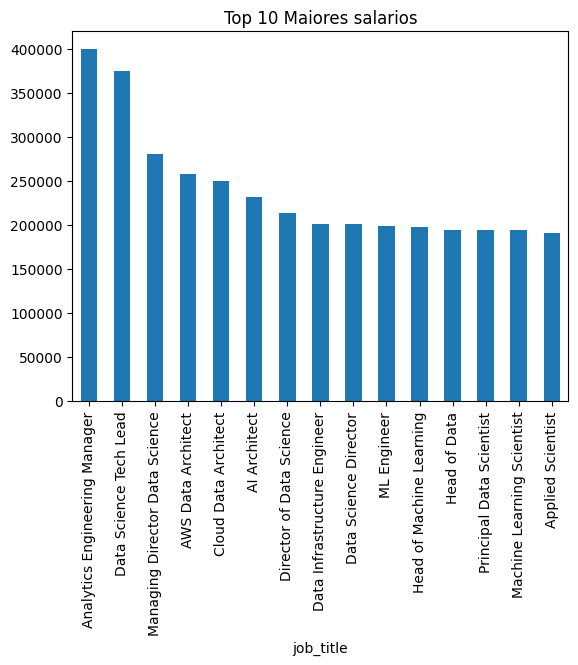

In [14]:
job=df.groupby('job_title')
df['job_title'].nunique()
job['salary_in_usd'].mean().nlargest(15).plot(kind='bar')
plt.title('Top 10 Maiores salarios')
plt.show()

Com o dataset completo, podemos ver que essas são as areas com as 10 maiores medias de salario no mundo da ciência de dados.

In [15]:
df_merge_mais_comuns = df['job_title']
df_merge_mais_comuns[:10]

0       Data Engineer
1       Data Engineer
2      Data Scientist
3      Data Scientist
4        BI Developer
5        BI Developer
6    Research Analyst
7    Research Analyst
8       Data Engineer
9       Data Engineer
Name: job_title, dtype: object

Agora para melhorar nossa analise sobre esses dados das areas com mais vagas, irmemos juntar as vagas com nomes semelhantes. Acima estamos criando uma variavel apenas com os dados da coluna 'job_title', e imprimindo os 10 primeiros valores.

In [16]:
from collections import Counter
counts = Counter(df_merge_mais_comuns)
common_skills = counts.most_common(15)
common_skills

[('Data Engineer', 1307),
 ('Data Scientist', 1243),
 ('Data Analyst', 910),
 ('Machine Learning Engineer', 629),
 ('Analytics Engineer', 246),
 ('Research Scientist', 206),
 ('Data Architect', 176),
 ('Research Engineer', 136),
 ('ML Engineer', 113),
 ('Applied Scientist', 97),
 ('Data Science Manager', 86),
 ('Business Intelligence Analyst', 82),
 ('Machine Learning Scientist', 73),
 ('Business Intelligence Engineer', 69),
 ('Data Manager', 63)]

Apos separarmos os dados na variavel "*df_merge_mais_comuns*", estamos contando quais são os 15 nomes com maior frequencia de aparições nesse dataset.

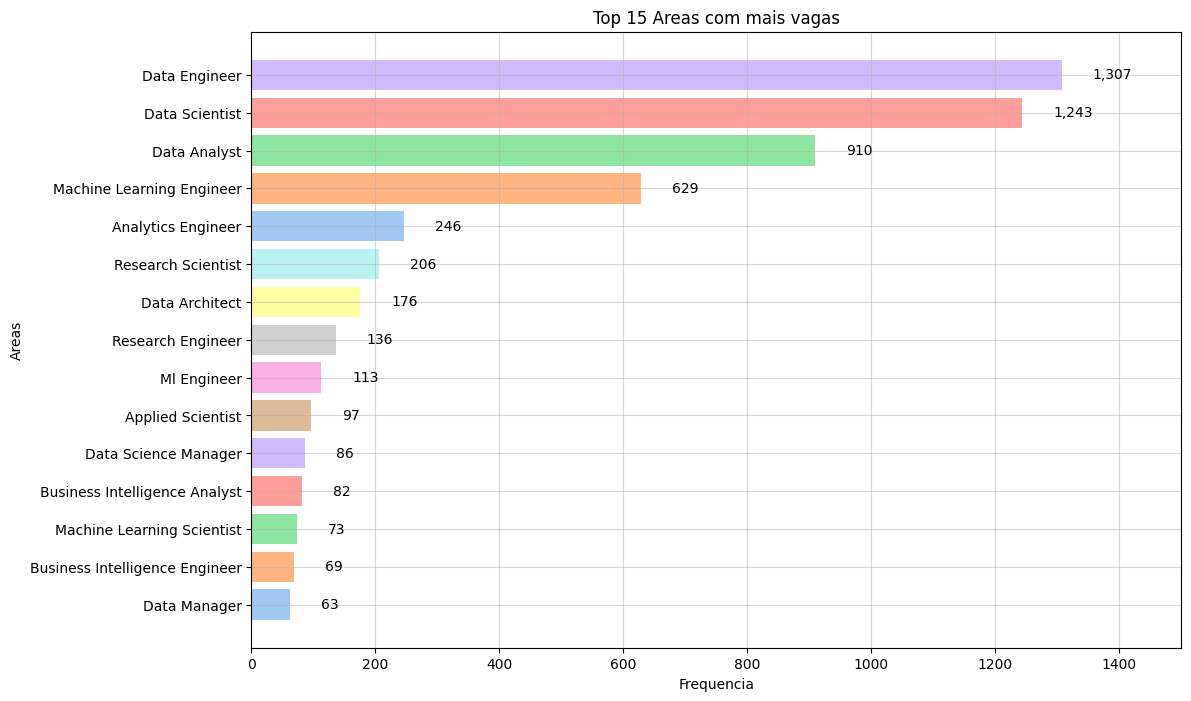

In [17]:
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("pastel"))

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 50
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center')

plt.xlabel('Frequencia')
plt.ylabel('Areas')
plt.title('Top 15 Areas com mais vagas')

# Colocamos linhas nos eixos, para que facilite a compreenção do grafico
plt.grid(axis='both', linestyle='-', alpha=0.5)

# Mudamos o eixo X para que tenho o valor maximo de 1500, para melhorar a visualização
plt.xlim(0, 1500)
plt.show()

Antes de fundirmos os nomes similares, podemos ver quais são as areas e os dados que tem maior recorrencia.

In [18]:
top_2000 = counts.most_common(6000)
counter_2000 = Counter(dict(top_2000))

In [19]:
from difflib import SequenceMatcher, get_close_matches

# Função para mesclar rótulos semelhantes
def merge_similar_labels(counter_2000):
    merged_counts = {}
    merged = set()

    for label, count in counter_2000.items():
        if label in merged:
            continue  # Ignorar se já estiver mesclado

        # Encontre os rótulos mais semelhantes ao rótulo atual com similaridade superior a 90%
        similar_labels = get_close_matches(label, counter_2000.keys(), cutoff=0.85)

        # Escolha o rótulo mais adequado entre os rótulos semelhantes (o mais longo)
        chosen_label = min(similar_labels, key=len)

        # Some as contagens de rótulos semelhantes e atribua-os ao rótulo escolhido
        merged_counts[chosen_label] = sum(counter_2000[l] for l in similar_labels)
        if (len(list(l for l in similar_labels)) > 1):
            print(list(l for l in similar_labels), len(list(l for l in similar_labels)))

        # Marcar os rótulos semelhantes como mesclados
        merged.update(similar_labels)

    return merged_counts

# Mesclar rótulos com similaridade superior a 90%
merged_counts = merge_similar_labels(counter_2000)
len(merged_counts)

['Data Engineer', 'BI Data Engineer', 'Big Data Engineer'] 3
['Data Analyst', 'BI Data Analyst'] 2
['Machine Learning Engineer', 'Lead Machine Learning Engineer', 'Staff Machine Learning Engineer'] 3
['Analytics Engineer', 'Data Analytics Engineer'] 2
['Data Architect', 'Big Data Architect', 'AWS Data Architect'] 3
['Research Engineer', 'AI Research Engineer'] 2
['ML Engineer', 'MLOps Engineer', 'NLP Engineer'] 3
['Applied Scientist', 'Applied Data Scientist'] 2
['Business Intelligence Analyst', 'Business Intelligence Data Analyst', 'Business Intelligence Specialist'] 3
['Machine Learning Scientist', 'Machine Learning Specialist', 'Applied Machine Learning Scientist'] 3
['Business Intelligence Engineer', 'Business Intelligence Manager'] 2
['BI Developer', 'AI Developer'] 2
['Data Modeler', 'Data Modeller'] 2
['Data Science Lead', 'Data Science Tech Lead'] 2
['Machine Learning Researcher', 'Machine Learning Research Engineer'] 2
['Data Operations Engineer', 'Data Integration Engineer', 

102

Aqui temos os nomes das areas que foram mescladas conforme sua compatibilidade com os nomes das areas, assim reduzimos para apenas 23 areas diferentes nas quais podemos ter uma maior noção de como está o mercado para essas areas.

In [20]:
merged_counts = Counter(merged_counts)
merged_counts.most_common(20)

[('Data Engineer', 1318),
 ('Data Scientist', 1243),
 ('Data Analyst', 927),
 ('Machine Learning Engineer', 636),
 ('Machine Learning Manager', 633),
 ('Analytics Engineer', 251),
 ('Research Scientist', 206),
 ('Data Architect', 179),
 ('Research Engineer', 141),
 ('ML Engineer', 115),
 ('Applied Scientist', 109),
 ('Machine Learning Scientist', 89),
 ('Business Intelligence Analyst', 88),
 ('Data Science Manager', 86),
 ('Business Intelligence Manager', 75),
 ('Data Manager', 63),
 ('Research Analyst', 60),
 ('BI Developer', 59),
 ('Data Science', 56),
 ('AI Engineer', 48)]

E então verificamos quantas ocorrencias temos em cada uma das areas que foram mescladas.

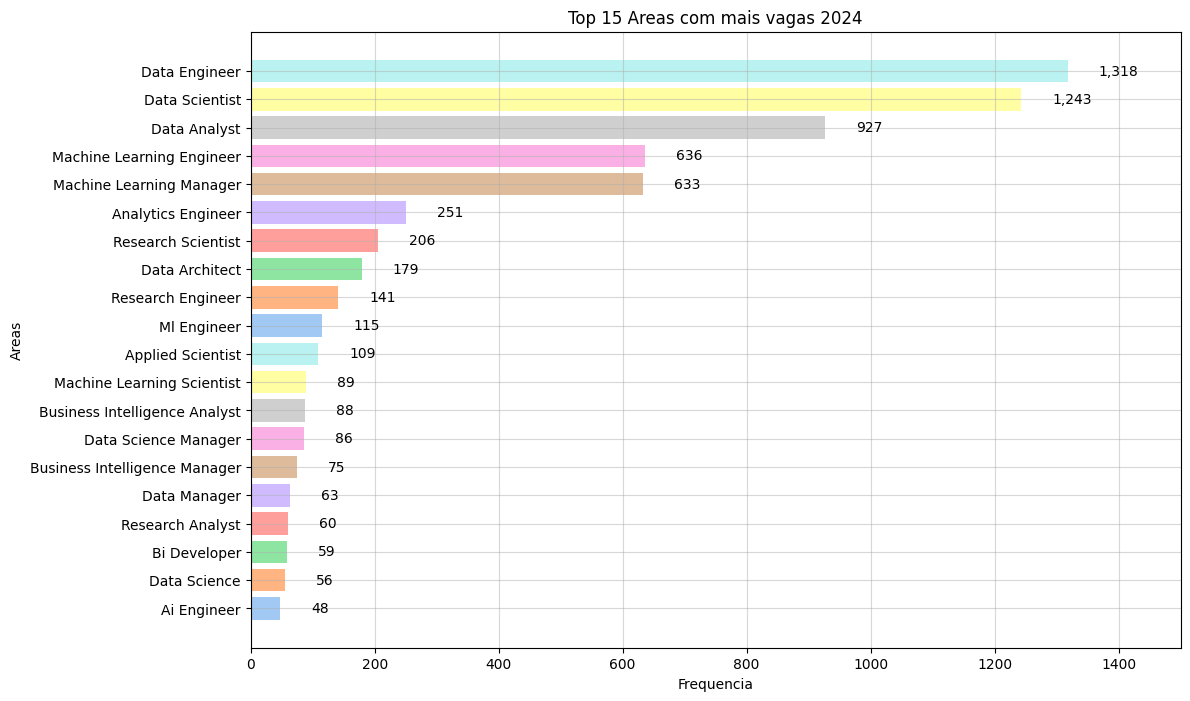

In [21]:
labels, values = zip(*merged_counts.most_common(20))
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("pastel"))


for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 50
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center')

plt.xlabel('Frequencia')
plt.ylabel('Areas')
plt.title('Top 15 Areas com mais vagas 2024')

# Colocamos linhas nos eixos, para que facilite a compreenção do grafico
plt.grid(axis='both', linestyle='-', alpha=0.5)

# Mudamos o eixo X para que tenho o valor maximo de 1500, para melhorar a visualização
plt.xlim(0, 1500)
plt.show()

Agora com os dados parecidos unidos, podemos ver que quais areas tem mais vagas, dando assim uma noção mais clara e não poluida graficamente.

#1.3

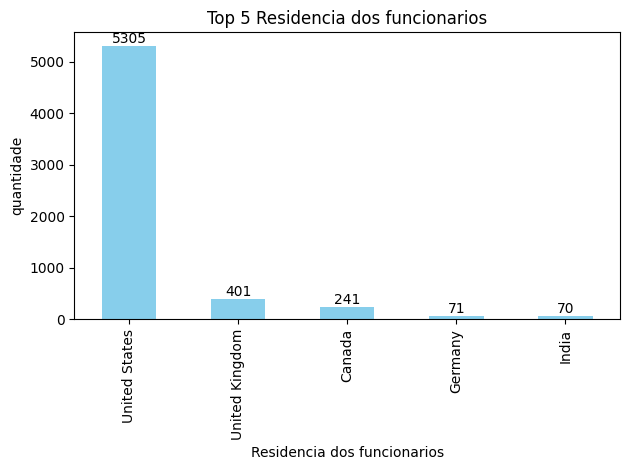

In [22]:
top_paises = df['employee_residence'].value_counts().nlargest(5)

# Criar o gráfico de barras
top_paises.plot(kind='bar', color='skyblue')

# Adicionar números sobre as barras
for index, value in enumerate(top_paises):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Título e rótulos dos eixos
plt.title('Top 5 Residencia dos funcionarios')
plt.xlabel('Residencia dos funcionarios')
plt.ylabel('quantidade')

plt.tight_layout()

# Mostrar o gráfico
plt.show()

O gráfico acima destaca as cinco principais localidades de residência no conjunto de dados. Observamos que há uma predominância significativa de dados dos Estados Unidos, o que pode dificultar a análise de informações de outros países. Por essa razão, optei por agrupar os países em regiões, buscando uma abordagem mais coesa para facilitar a análise gráfica e reduzir a dispersão dos dados.


In [23]:
df['employee_residence'].value_counts()

United States     5305
United Kingdom     401
Canada             241
Germany             71
India               70
                  ... 
Georgia              1
Israel               1
Qatar                1
Peru                 1
Honduras             1
Name: employee_residence, Length: 87, dtype: int64

In [24]:
unique_countries = df['employee_residence'].unique()
print(unique_countries)

['United States' 'Romania' 'Portugal' 'Lebanon' 'India' 'Ireland'
 'United Kingdom' 'Spain' 'Egypt' 'Germany' 'Canada' 'Australia' 'Vietnam'
 'Uganda' 'Italy' 'Thailand' 'Philippines' 'Tunisia' 'Belgium' 'Turkey'
 'Nigeria' 'Uzbekistan' 'Argentina' 'France' 'Kuwait' 'Ukraine'
 'South Africa' 'Slovenia' 'Singapore' 'Sweden' 'Saudi Arabia' 'Armenia'
 'Russia' 'Georgia' 'Qatar' 'Peru' 'Poland' 'New Zealand' 'Norway'
 'Netherlands' 'Mexico' 'Latvia' 'Pakistan' 'Lithuania' 'South Korea'
 'Kenya' 'Moldova' 'Israel' 'Hungary' 'Croatia' 'Hong Kong' 'Greece'
 'Ghana' 'Finland' 'Estonia' 'Cyprus' 'Ecuador' 'Austria' 'Colombia'
 'Switzerland' 'Central African Republic' 'Czech Republic' 'Brazil'
 'Bosnia and Herzegovina' 'Andorra' 'China' 'Costa Rica' 'Chile' 'Bolivia'
 'Malaysia' 'United Arab Emirates' 'Puerto Rico' 'Japan' 'Iran'
 'Indonesia' 'Dominican Republic' 'Algeria' 'Bulgaria' 'Malta'
 'Luxembourg' 'Iraq' 'Denmark' 'Serbia' 'Jersey' 'American Samoa'
 'Mauritius' 'Honduras']


Nos códigos anteriores, o objetivo era identificar a quantidade de países distintos presentes no conjunto de dados. Em seguida, analisei individualmente esses valores para posteriormente agrupá-los nas respectivas regiões correspondentes. Esse processo visa preparar os dados de forma mais organizada e facilitar análises posteriores.

In [25]:
region_mapping = {
    'United States': 'North America',
    'Romania': 'Europe',
    'Portugal': 'Europe',
    'Lebanon': 'Middle East',
    'India': 'Asia',
    'Ireland': 'Europe',
    'United Kingdom': 'Europe',
    'Spain': 'Europe',
    'Egypt': 'Africa',
    'Germany': 'Europe',
    'Canada': 'North America',
    'Australia': 'Oceania',
    'Vietnam': 'Asia',
    'Uganda': 'Africa',
    'Italy': 'Europe',
    'Thailand': 'Asia',
    'Philippines': 'Asia',
    'Tunisia': 'Africa',
    'Belgium': 'Europe',
    'Turkey': 'Middle East',
    'Nigeria': 'Africa',
    'Uzbekistan': 'Asia',
    'Argentina': 'South America',
    'France': 'Europe',
    'Kuwait': 'Middle East',
    'Ukraine': 'Europe',
    'South Africa': 'Africa',
    'Slovenia': 'Europe',
    'Singapore': 'Asia',
    'Sweden': 'Europe',
    'Saudi Arabia': 'Middle East',
    'Armenia': 'Asia',
    'Russia': 'Europe',
    'Georgia': 'Europe',
    'Qatar': 'Middle East',
    'Peru': 'South America',
    'Poland': 'Europe',
    'New Zealand': 'Oceania',
    'Norway': 'Europe',
    'Netherlands': 'Europe',
    'Mexico': 'North America',
    'Latvia': 'Europe',
    'Pakistan': 'Asia',
    'Lithuania': 'Europe',
    'South Korea': 'Asia',
    'Kenya': 'Africa',
    'Moldova': 'Europe',
    'Israel': 'Middle East',
    'Hungary': 'Europe',
    'Croatia': 'Europe',
    'Hong Kong': 'Asia',
    'Greece': 'Europe',
    'Ghana': 'Africa',
    'Finland': 'Europe',
    'Estonia': 'Europe',
    'Cyprus': 'Europe',
    'Ecuador': 'South America',
    'Austria': 'Europe',
    'Colombia': 'South America',
    'Switzerland': 'Europe',
    'Central African Republic': 'Africa',
    'Czech Republic': 'Europe',
    'Brazil': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Andorra': 'Europe',
    'China': 'Asia',
    'Costa Rica': 'North America',
    'Chile': 'South America',
    'Bolivia': 'South America',
    'Malaysia': 'Asia',
    'United Arab Emirates': 'Middle East',
    'Puerto Rico': 'North America',
    'Japan': 'Asia',
    'Iran': 'Middle East',
    'Indonesia': 'Asia',
    'Dominican Republic': 'North America',
    'Algeria': 'Africa',
    'Bulgaria': 'Europe',
    'Malta': 'Europe',
    'Luxembourg': 'Europe',
    'Iraq': 'Middle East',
    'Denmark': 'Europe',
    'Serbia': 'Europe',
    'Jersey': 'Europe',
    'American Samoa': 'Oceania',
    'Mauritius': 'Africa',
    'Honduras': 'North America'
}

# Cria um novo data-frame 'df_region' com base no mapeamento
df_regiao = df['employee_residence'].map(region_mapping)

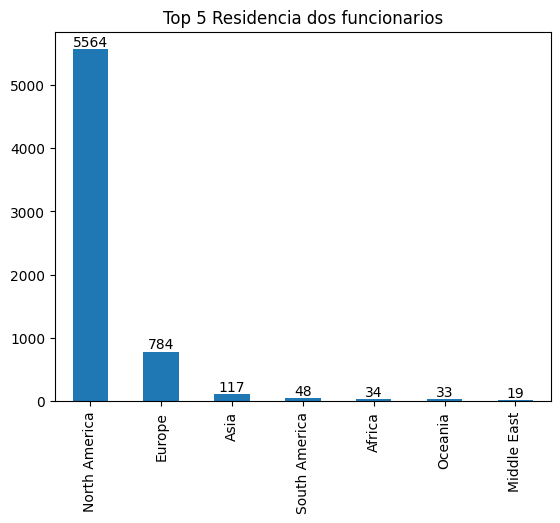

In [26]:
paises=df_regiao.value_counts()

# Criar o gráfico de barras
paises.plot(kind='bar')

# Adicionar números sobre as barras
for index, value in enumerate(paises):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Título e mostrar o gráfico
plt.title('Top 5 Residencia dos funcionarios')
plt.show()

Neste último gráfico, realizado após o mapeamento das regiões, destacamos uma significativa discrepância dos Estados Unidos em relação às demais regiões. No entanto, com esse agrupamento, conseguimos visualizar de maneira mais clara e concisa a distribuição nas diferentes regiões.

#1.4 Nivel experiencia

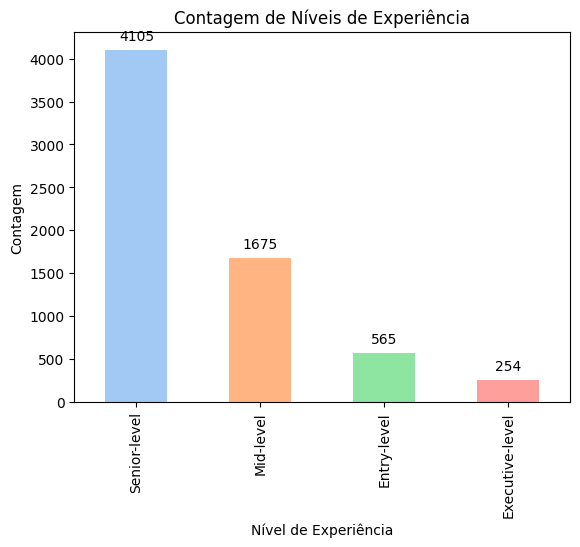

In [27]:
# Contagem dos valores
valores = df['experience_level'].value_counts()

# Criar o gráfico de barras
ax = valores.plot(kind='bar', color=sns.color_palette("pastel"))

# Adicionar números sobre as barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Título e rótulos dos eixos
plt.title('Contagem de Níveis de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

Um passo importante para a analise é sabermos quais os niveis possuem mais oportunidades de vagas, para assim termos uma ideia de como o mercada está, nesse caso do graico gerado acima podemos ver que existem mais vagas para profissionais de nivel medio-avançado, deixando ambas as pontas iniciantes e mais experientes com um numero menor de vagas.

In [28]:
exp=df.groupby('experience_level')
exp['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
Entry-level,565.0,84448.916814,48758.315152,15000.0,49646.0,75000.0,110000.0,350000.0
Executive-level,254.0,189687.346457,71571.166828,15000.0,136000.0,184560.0,230000.0,465000.0
Mid-level,1675.0,119019.812537,71783.359309,15000.0,73523.0,106500.0,150000.0,750000.0
Senior-level,4105.0,162071.063581,64444.875091,15809.0,118000.0,153600.0,199200.0,750000.0


Um exemplo interessante para explorar a relação entre a experiência e a média salarial é agrupar a coluna que contém os dados de experiência junto com os salários. Dessa forma, podemos realizar uma análise abrangente, incluindo a contagem de observações, a média, o valor máximo, o valor mínimo e outros indicadores relevantes. Isso proporciona uma visão mais completa sobre como a experiência pode influenciar os salários dentro do conjunto de dados.

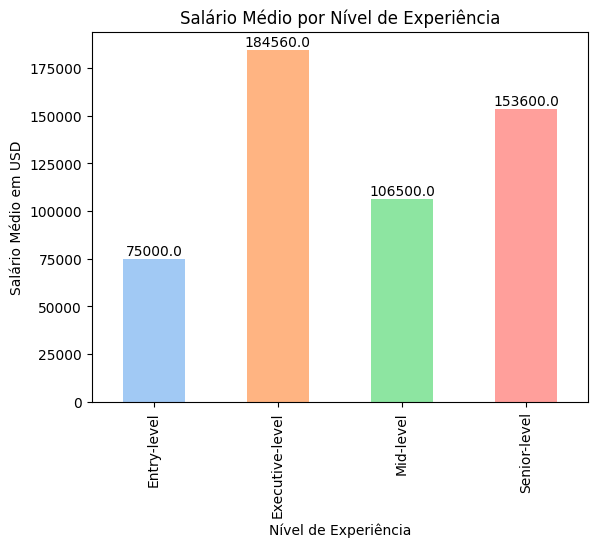

In [29]:
exp = df.groupby('experience_level')['salary_in_usd'].median()

# Configurar a paleta de cores
sns.set_palette("pastel")

# Criar o gráfico de barras
ax = exp.plot(kind='bar', color=sns.color_palette())

# Adicionar valores acima das barras
for i, v in enumerate(exp):
    ax.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

# Título e rótulos dos eixos
plt.title('Salário Médio por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio em USD')

# Mostrar o gráfico
plt.show()

Aqui representamos graficamente a media salarial de cada nivel de experiencia. Para que possamos ter uma visualização mais clara, não apenas uma coluna cheia de numeros.

#1.5 Tamanho empresa

In [30]:
df.company_size.value_counts()
com=df.groupby('company_size')
com['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
Large,569.0,120638.404218,76206.836500,15000.0,63000.0,106000.0,160000.00,423000.0
Medium,5860.0,149659.386689,69490.490642,15000.0,100000.0,141562.5,187025.00,750000.0
Small,170.0,87687.458824,59492.105686,15809.0,50000.0,74500.0,114761.75,416000.0


Seguindo a mesma ideia de vermos os salarios por experiencia, aqui iremos analisar o salario de acordo com o tamanho da empresa.

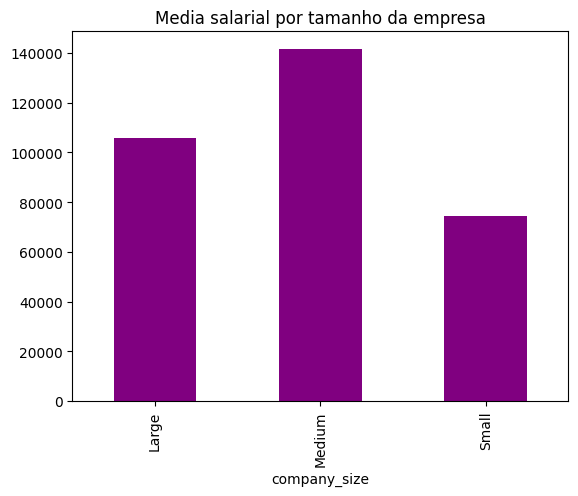

In [31]:
com['salary_in_usd'].median().plot(kind='bar', color= "purple")
plt.title('Media salarial por tamanho da empresa')
plt.show()

Uma visualização rapida para se ter uma melhor ideia de qual tipo de empresa paga a maior media de salario, podemos ver que as empresas de nivel medio se saem melhores para os funcionarios, esse fenomeno pode estar ocorrendo pois as empresas medias estão tentando crescer e se consolidar, e ao fazer isso tem elas concorrem com as maiores e tem que pagar mais para atrair o profissional.

#1.6 Modelos de trabalho

In [32]:
df.work_models.value_counts()
work=df.groupby('work_models')
work['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
work_models,,,,,,,,
Hybrid,225.0,83293.502222,61764.491896,15680.0,44753.0,66192.0,105066.0,423000.0
On-site,3813.0,152600.100970,72701.484514,15000.0,100000.0,142200.0,191765.0,750000.0
Remote,2561.0,140550.137837,65795.137323,15000.0,93000.0,136000.0,180000.0,700000.0


Seguindo a mesma ideia de vermos os salarios por modelo de trabalho, aqui iremos analisar o salario de acordo com o tamanho da empresa.

In [33]:
def data_analysis(df, column_name, color, text_width=0.6, bar_width=0.8, bar_length_multiplier=1.0):
    counts = df[column_name].value_counts().values
    cls_names = df[column_name].value_counts().keys()
    width, text_width, text_height = bar_width, text_width, 0.3 * bar_length_multiplier

    fig, ax = plt.subplots(figsize=(20, 10))
    indices = np.arange(len(counts))

    ax.bar(indices, counts, width * bar_length_multiplier, color=color)
    ax.set_xlabel("Nomes")
    ax.set_xticklabels(cls_names, rotation=90)
    ax.set(xticks=indices, xticklabels=cls_names)
    ax.set_ylabel("Quantidade")
    ax.set_title(f" ")

    for i, v in enumerate(counts):
        ax.text(i, v + text_height, str(v), ha='center')

    #data_analysis(df=df, column_name="escolher a coluna que deseja analisar", color="skyblue", bar_width=0.5, bar_length_multiplier=1.5)

Desenvolvemos uma função para simplificar a geração de gráficos durante nossa análise, eliminando a necessidade de escrever extensos blocos de código. O exemplo comentado no final do código ilustra como utilizar essa função, permitindo a escolha da coluna desejada para criar o gráfico. Abaixo, apresentamos um exemplo dessa função em ação, gerando gráficos relacionados à coluna *'work_models'*.

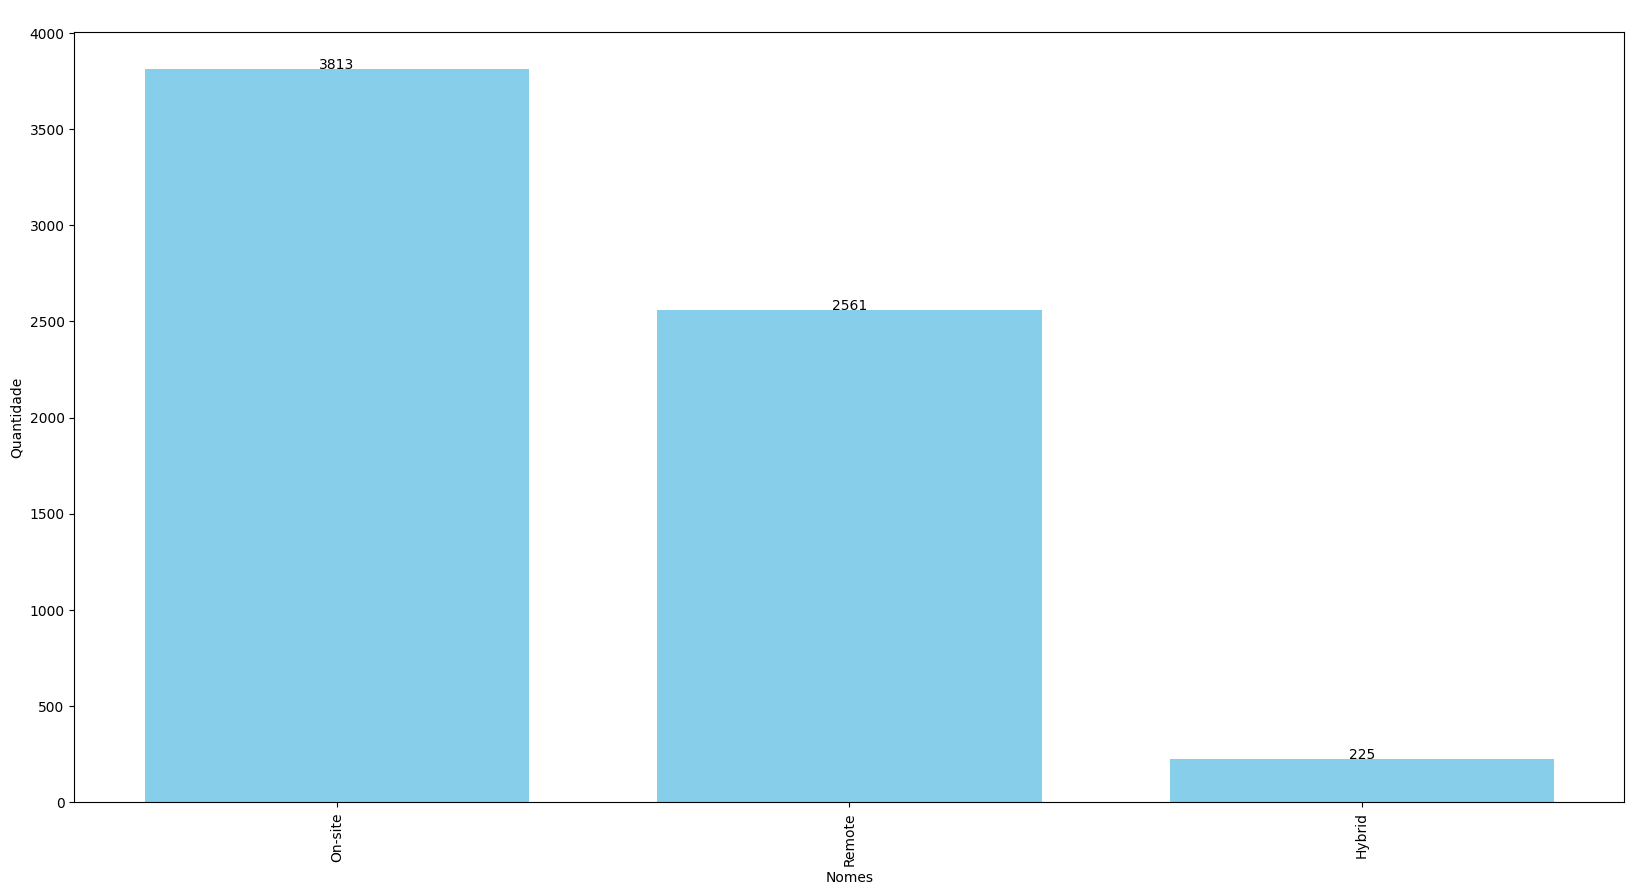

In [34]:
data_analysis(df=df, column_name="work_models", color="skyblue", bar_width=0.5, bar_length_multiplier=1.5)

Com a ajuda de nossa função, criamos um grafico simples para que possamos ver qual a quantidade de vagas para qual modelo, sendo o modelo presencial com maior ocorrencias e o hibrido com a menor.

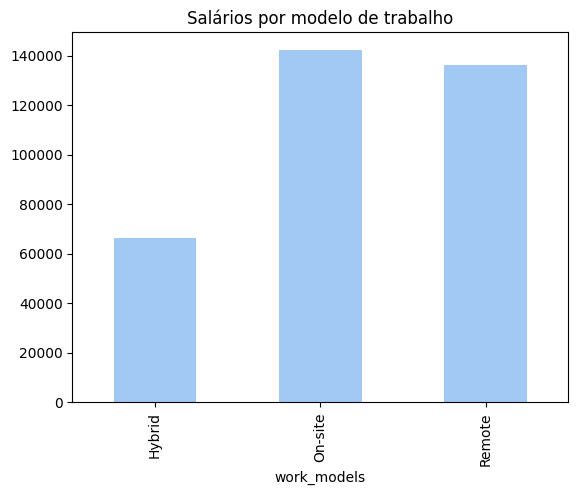

In [35]:
# Traçando a distribuição de salário por modelo de trabalho
work['salary_in_usd'].median().plot(kind='bar')
plt.title('Salários por modelo de trabalho')
plt.show()

Aqui podemos ver que os salarios de modelos presencias e remotos não distoem muito um do outro, o que fica realmente abaixo é do modelo hibrido, porem infelizmente não temos como analisar o porque disso estar acontecendo.

#1.7 Ano de trabalho

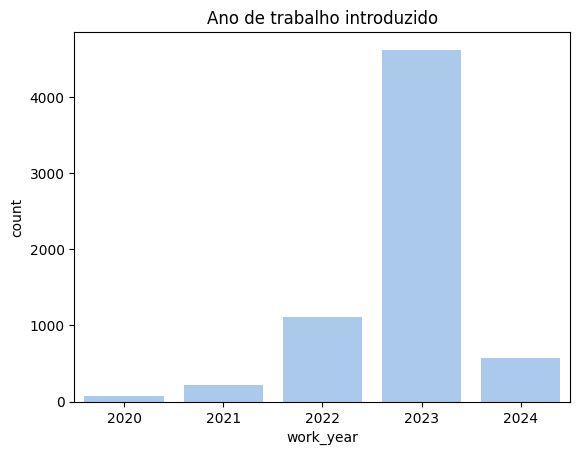

In [36]:
df['work_year'].value_counts()
sns.countplot(data=df,x=df['work_year'])
plt.title('Ano de trabalho introduzido')
plt.show()

Esse grafico nos mostra a quantidade de vagas disponiveis a cada ano, mostrando que é uma area que não para de crescer, mesmo em 2024, no qual foram coletados dados de apenas alguns meses do ano, já temos quase a mesma quantidade de 2022 todo, o que mostra uma area muito aquecida.

In [37]:
# Procurando os empregos de nível inicial mais contratados
pivot=pd.pivot_table(df,values='salary_in_usd',index='job_title',\
                     columns=['experience_level'],\
                    aggfunc='count')

pivot.nlargest(10,'Entry-level')

experience_level,Entry-level,Executive-level,Mid-level,Senior-level
job_title,,,,
Data Analyst,161.0,14.0,249.0,486.0
Data Scientist,97.0,23.0,329.0,794.0
Data Engineer,58.0,85.0,361.0,803.0
Machine Learning Engineer,29.0,6.0,122.0,472.0
Research Analyst,29.0,NaN,7.0,24.0
Research Scientist,19.0,3.0,63.0,121.0
Research Engineer,18.0,NaN,32.0,86.0
Business Intelligence Analyst,15.0,NaN,25.0,42.0
Analytics Engineer,7.0,12.0,44.0,183.0


Com os dados separados, podemos ver aqui quais são as areas com mais vagas separadas por nivel de experiencia.

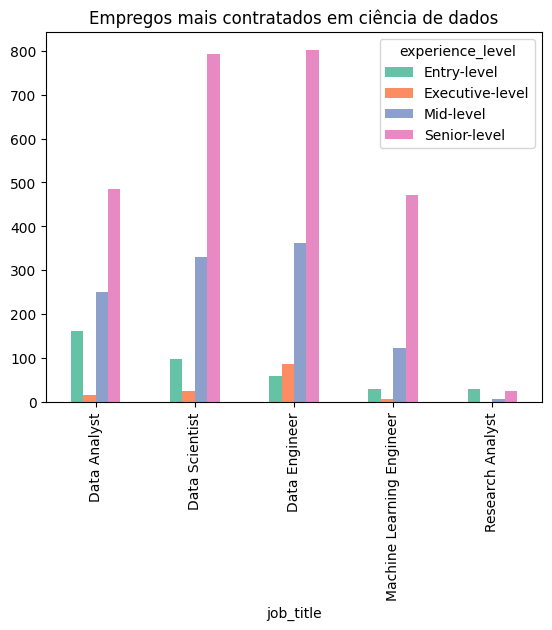

In [38]:
# traçando empregos de nível inicial mais contratados
pivot=pd.pivot_table(df,values='salary_in_usd',index='job_title',\
                     columns=['experience_level'],\
                    aggfunc='count')

# Escolher uma paleta de cores mais distintas
colors = sns.color_palette("Set2", n_colors=len(pivot.columns))

pivot.nlargest(5,'Entry-level').plot(kind='bar', color = colors)
plt.title('Empregos mais contratados em ciência de dados')
plt.show()

In [39]:
# Procurando empregos básicos com altos salários em ciência de dados
pivot=pd.pivot_table(df,values='salary_in_usd',index='job_title',\
                     columns=['experience_level'],\
                    aggfunc='mean')

pivot.nlargest(10,'Entry-level')

experience_level,Entry-level,Executive-level,Mid-level,Senior-level
job_title,,,,
Applied Scientist,180420.000000,NaN,166099.333333,196351.289474
Research Scientist,144914.105263,163017.666667,173199.920635,189610.595041
Cloud Data Engineer,138588.500000,NaN,89294.000000,160000.000000
Deep Learning Engineer,135000.000000,NaN,96361.500000,254706.000000
Research Engineer,118936.888889,NaN,181382.625000,198164.337209
Computer Vision Engineer,115902.250000,NaN,69437.500000,194565.350000
Machine Learning Scientist,113224.000000,190000.000000,226131.250000,188520.961538
AI Developer,110119.500000,NaN,138294.333333,162770.666667
Data Specialist,105000.000000,NaN,89213.379310,107770.588235


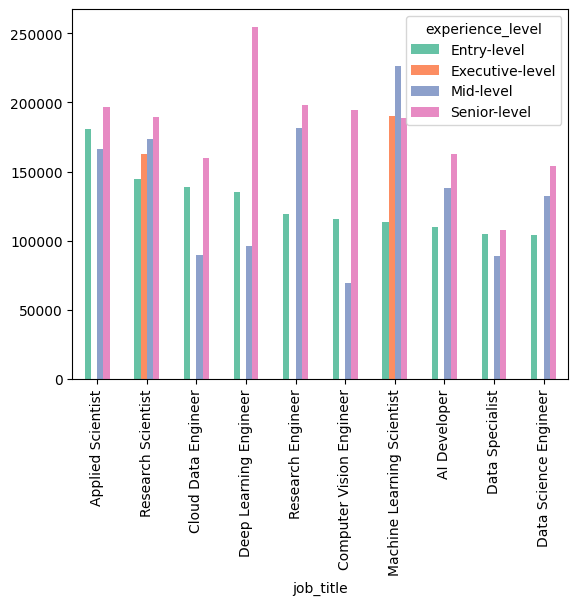

In [40]:
# traçando empregos bem remunerados por nível de experiência
# Criar o pivot table
pivot = pd.pivot_table(df, values='salary_in_usd', index='job_title', columns=['experience_level'], aggfunc='mean')

# Escolher uma paleta de cores mais distintas
colors = sns.color_palette("Set2", n_colors=len(pivot.columns))

# Plotar o gráfico de barras com as cores personalizadas
pivot.nlargest(10, 'Entry-level').plot(kind='bar', color=colors)

plt.show()


A ideia principal é visualizar os empregos melhor remunerados para o nível de experiência "Entry-level" (nível de entrada) em diferentes cargos. Esse gráfico fornecerá uma representação visual clara das médias salariais dos cargos de  diferentes níveis de experiência, permitindo uma fácil comparação entre essas categorias.

In [41]:
pivot.corr()

experience_level,Entry-level,Executive-level,Mid-level,Senior-level
experience_level,,,,
Entry-level,1.000000,0.257680,0.180358,0.370979
Executive-level,0.257680,1.000000,0.164429,0.382259
Mid-level,0.180358,0.164429,1.000000,0.368531
Senior-level,0.370979,0.382259,0.368531,1.000000


Essa matriz de correlação mostra como as diferentes variáveis (colunas) estão relacionadas umas com as outras em termos de correlação linear.

A correlação pode variar de -1 a 1, onde:

1 indica uma correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta na mesma proporção.
-1 indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui na mesma proporção.
0 indica ausência de correlação linear.

Abaixo podemos ver uma representação grafica dessa correlação.

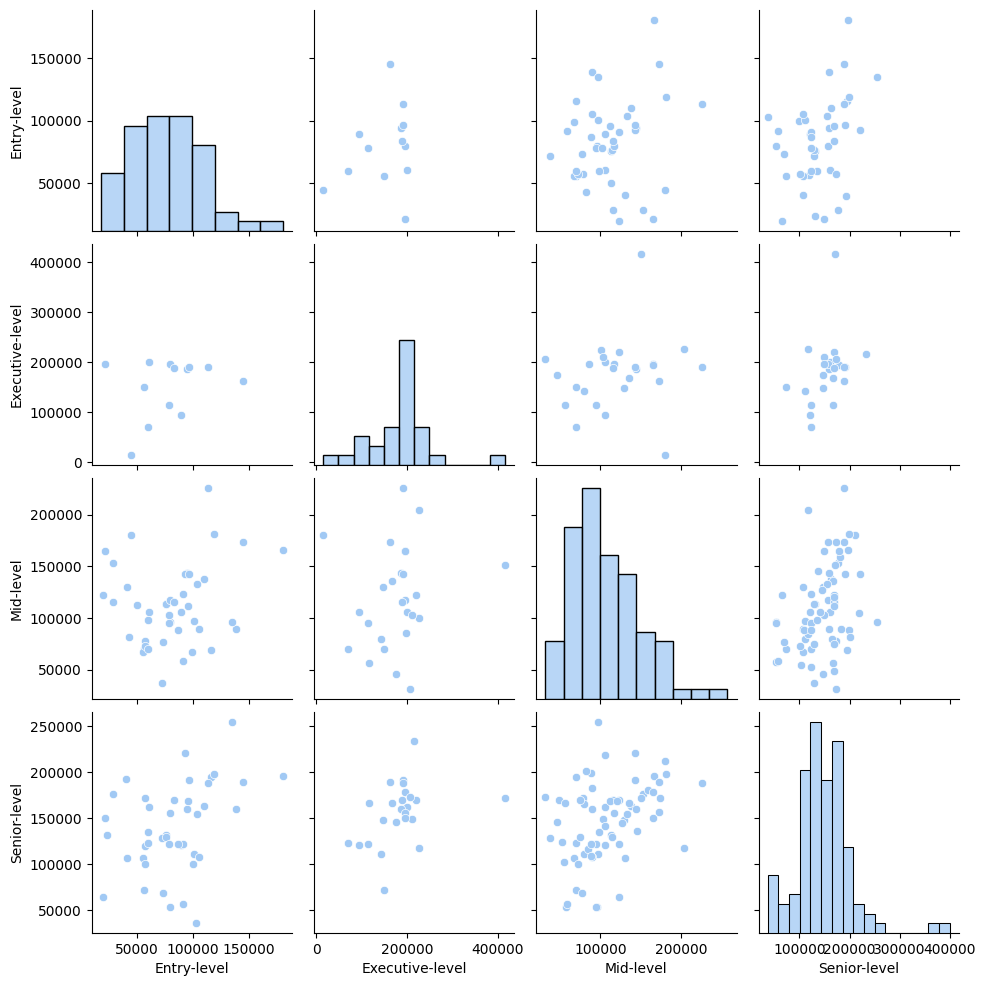

In [42]:
sns.pairplot(pivot)

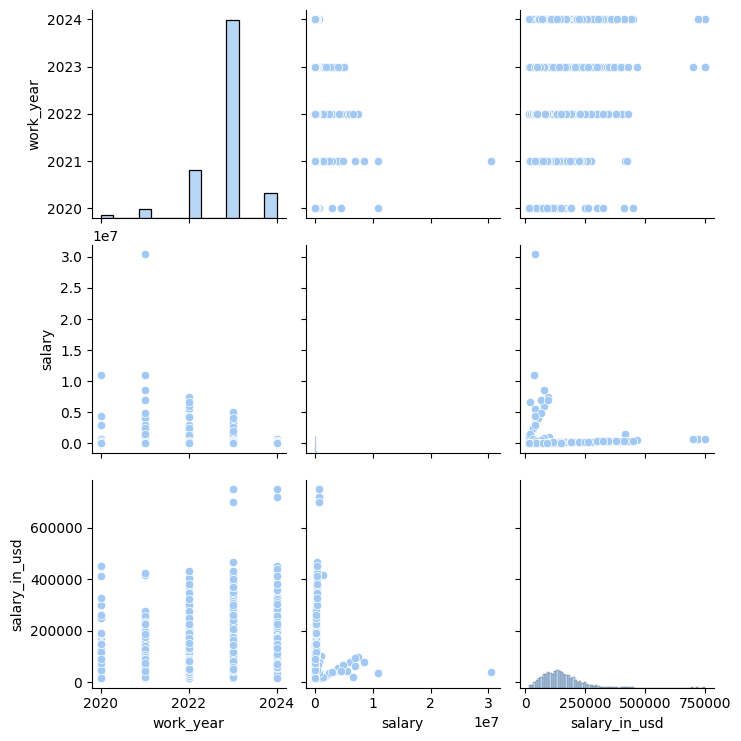

In [43]:
sns.pairplot(df)

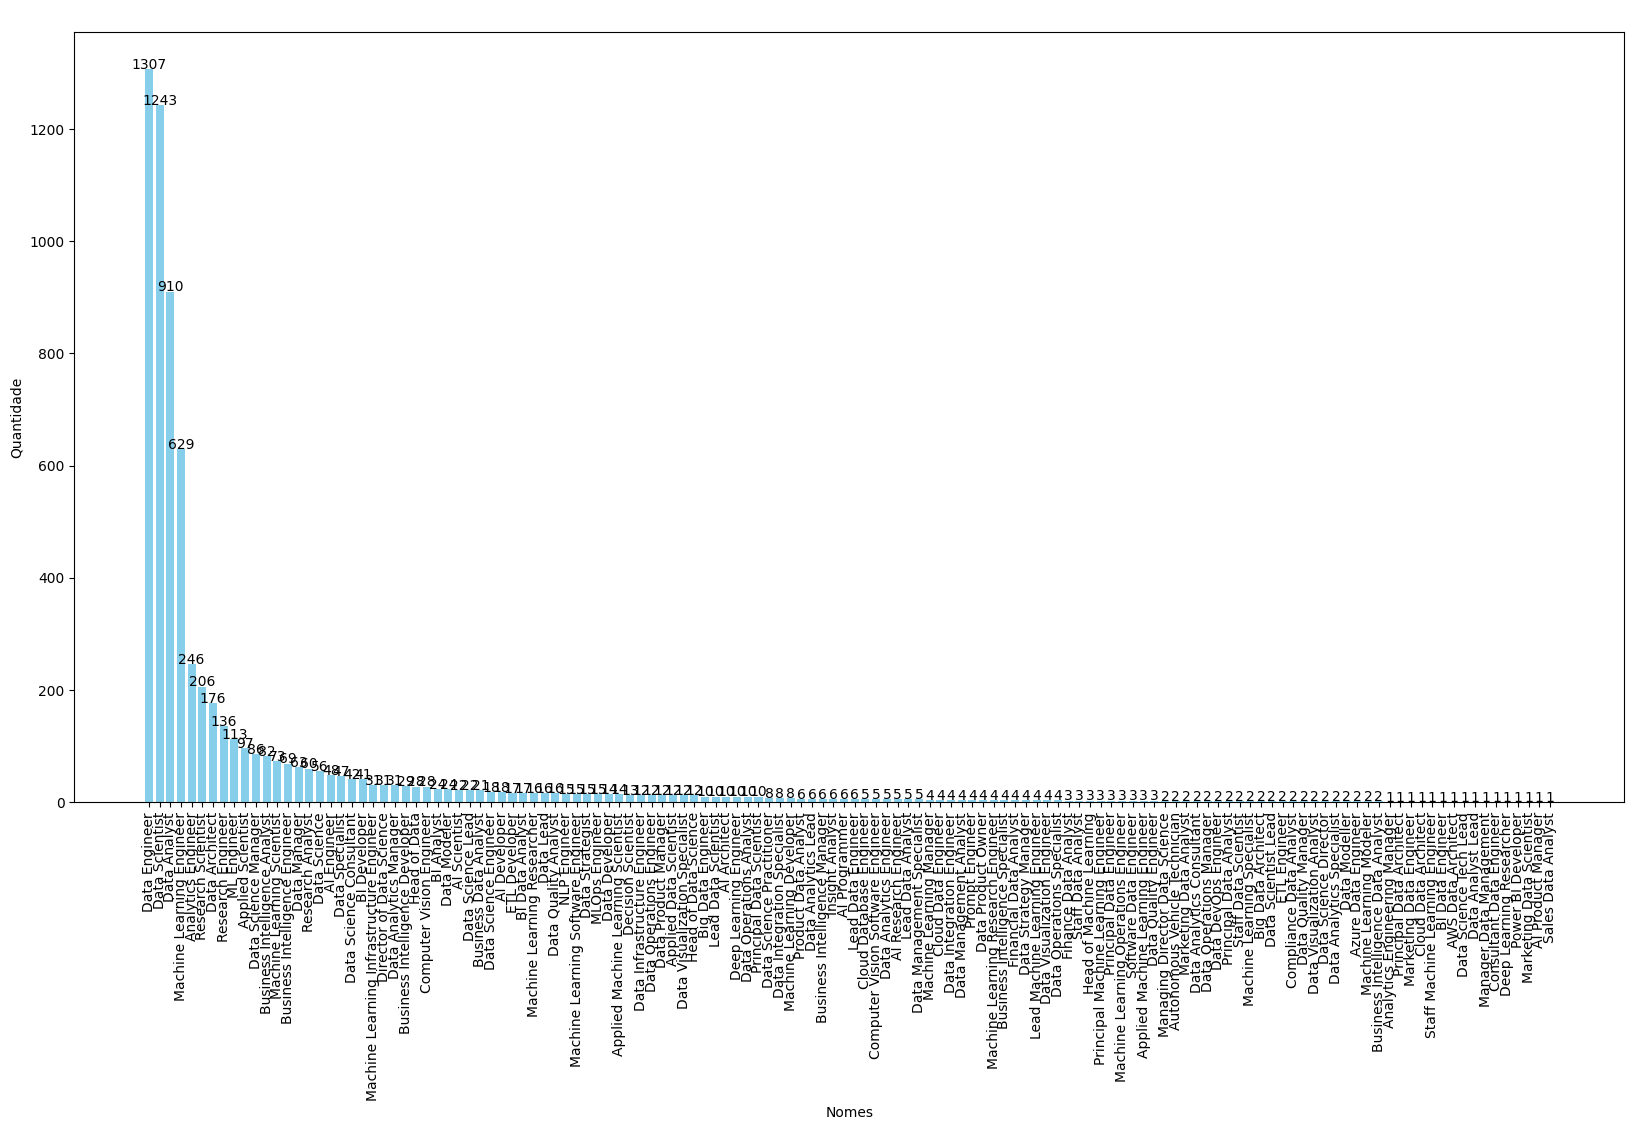

In [44]:
data_analysis(df=df, column_name="job_title", color="skyblue", bar_width=0.5, bar_length_multiplier=1.5)

Usando novamente nossa função, podemos ver todas as areas que possuem vaga, por esse motivo que unimos os dados parecidos mais acima no nosso codigo, para que tivessemos uma visualização mais clara.

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

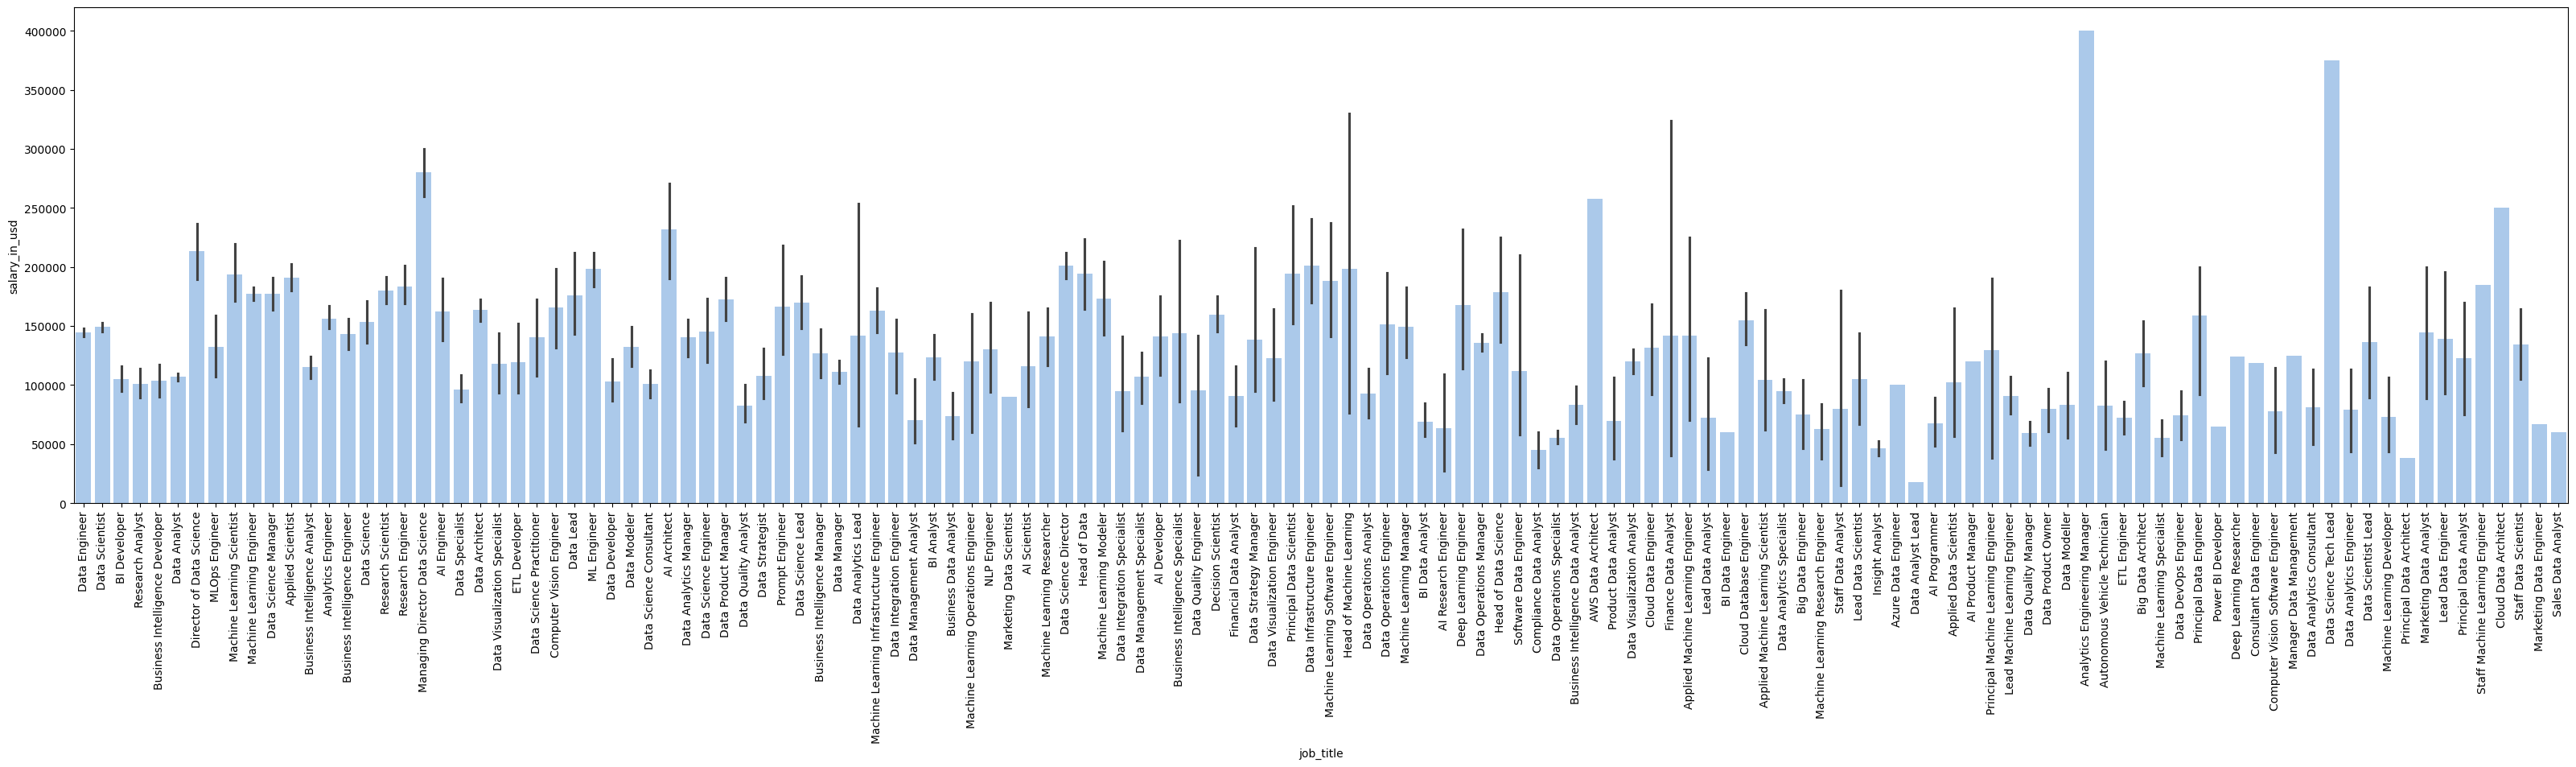

In [45]:
plt.figure(figsize=(40, 8))
plt.xticks(rotation=90)
sns.barplot(x='job_title', y='salary_in_usd', data=df)

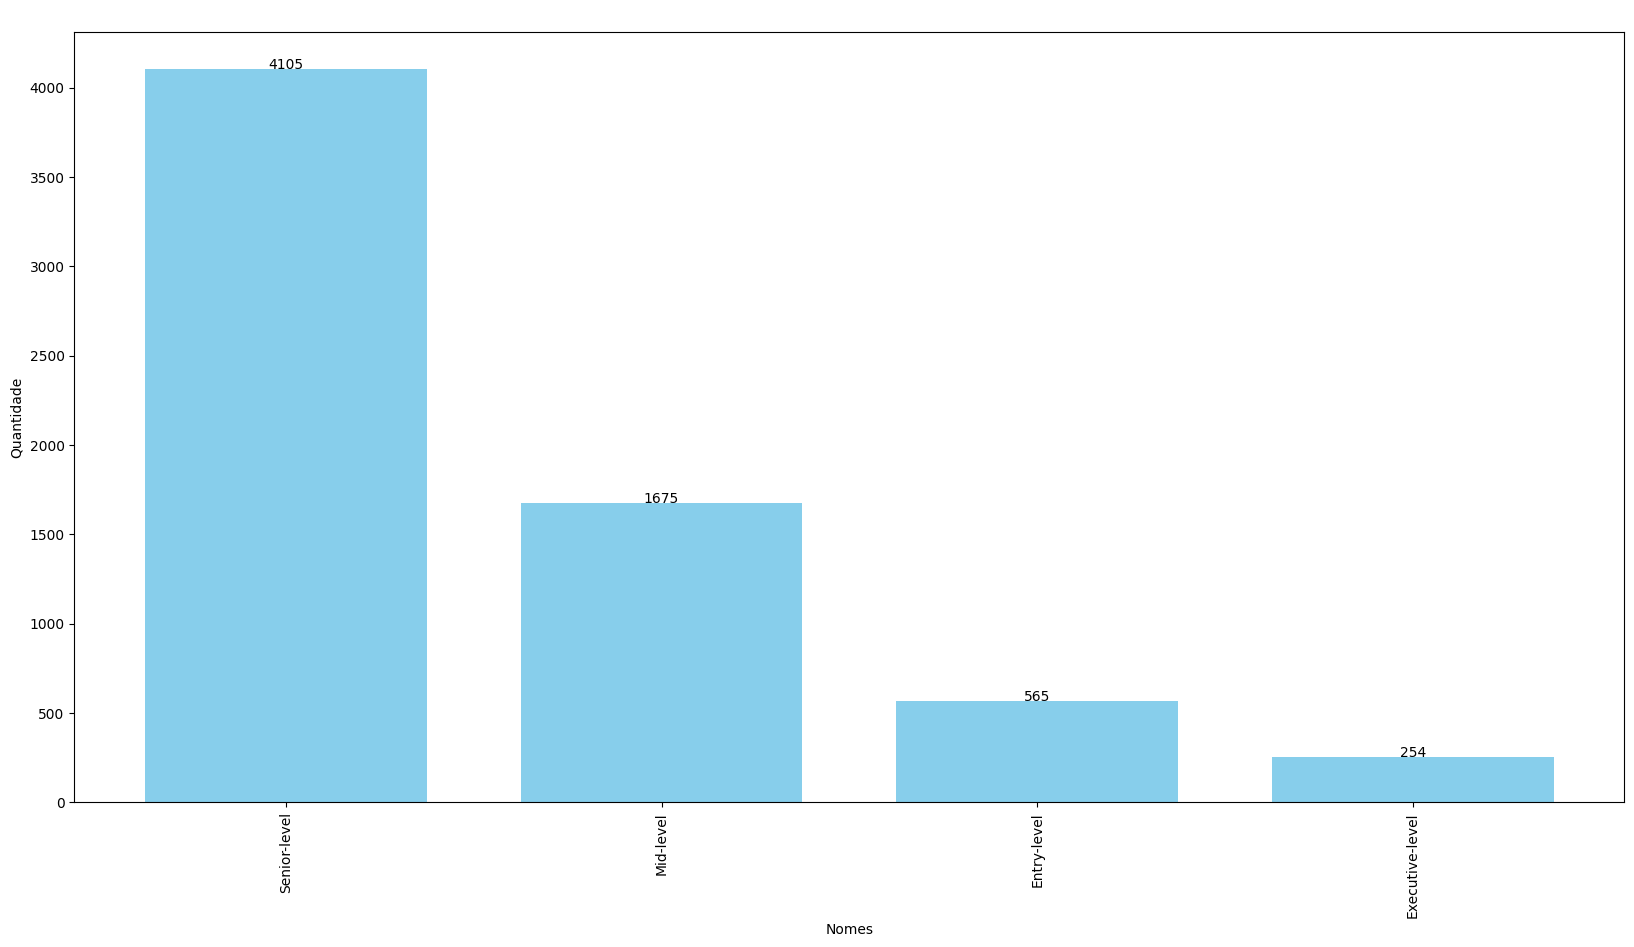

In [46]:
data_analysis(df=df, column_name="experience_level", color="skyblue", bar_width=0.5, bar_length_multiplier=1.5)

#1.9 Experiencia e Salario

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

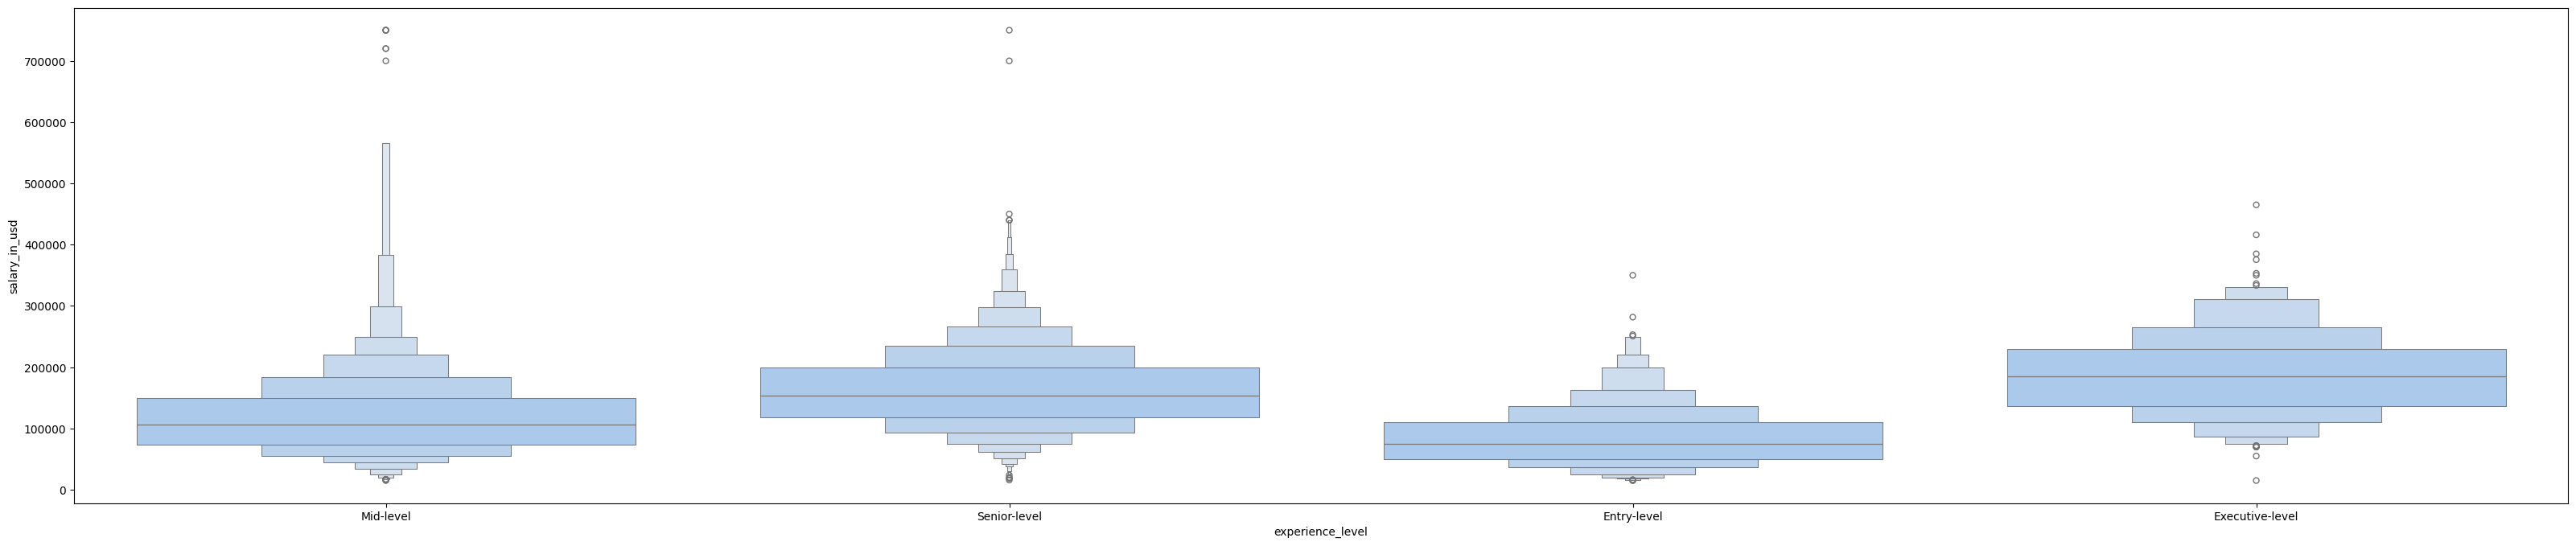

In [47]:
plt.figure(figsize=(40, 8))
sns.boxenplot(x='experience_level', y='salary_in_usd', data=df)

Ao analisar o gráfico, você pode observar a variação nos salários para cada nível de experiência. Cada "caixa" no gráfico mostra a distribuição interquartil (IQR), enquanto as linhas estendidas (também chamadas de "caudas") fornecem informações adicionais sobre a distribuição da amostra.

Esse tipo de visualização é valioso para identificar padrões de distribuição, variações nos dados e possíveis outliers em relação aos salários, permitindo uma compreensão mais profunda da relação entre a experiência e a remuneração na amostra de dados.

#1.10 Experiencia e ano de trabalho

<Axes: xlabel='experience_level', ylabel='work_year'>

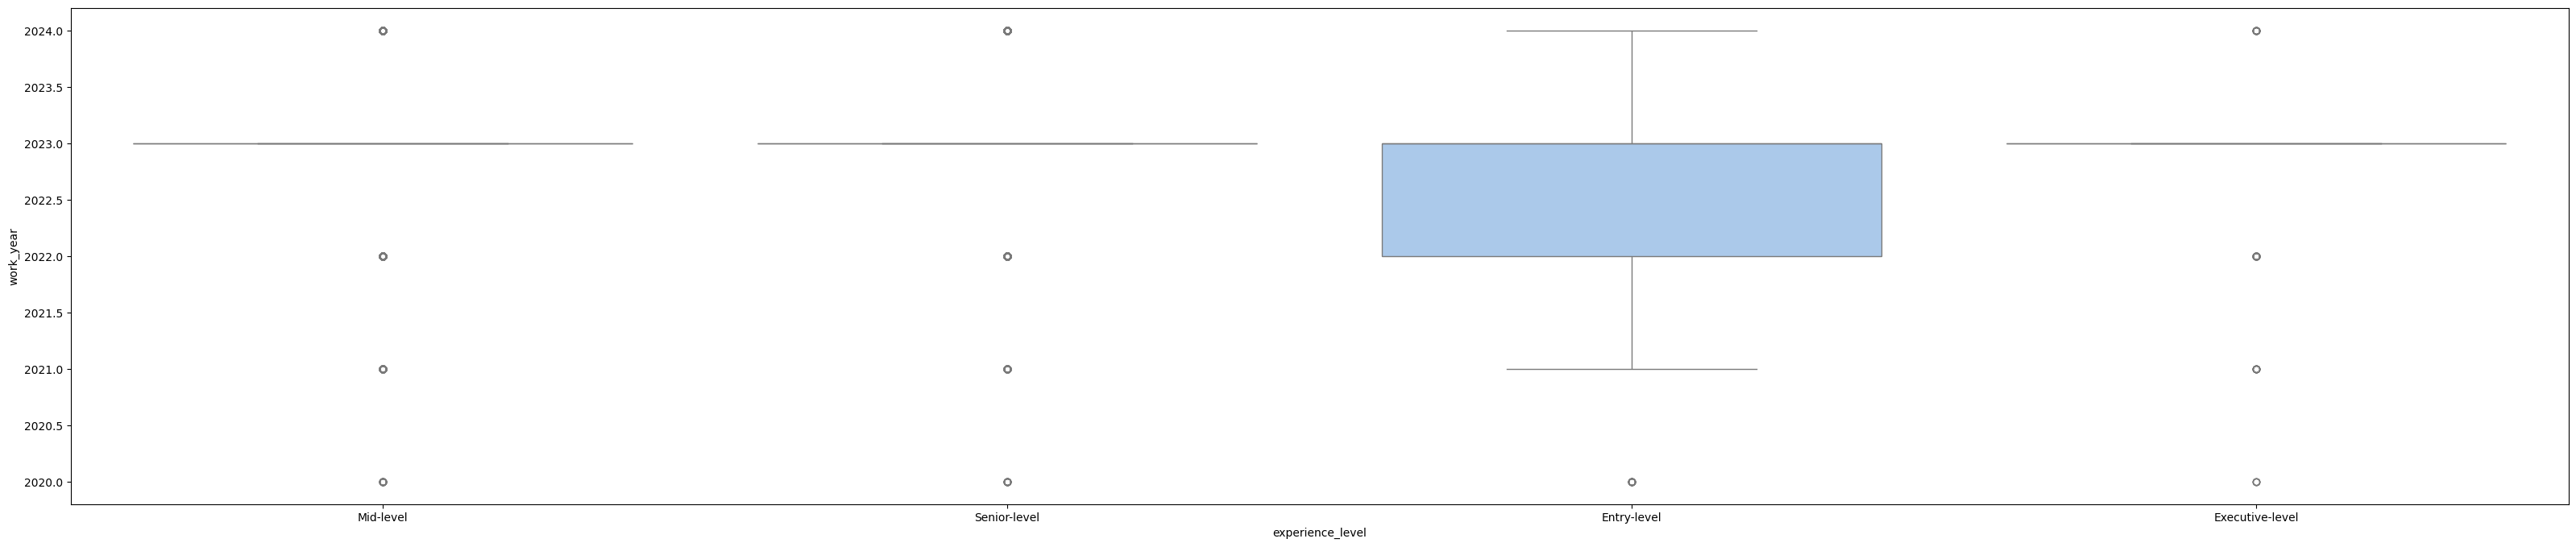

In [48]:
plt.figure(figsize=(40, 8))
sns.boxplot(x='experience_level', y='work_year', data=df)

#1.11 Modelo de trabalho e salário

<Axes: xlabel='work_models', ylabel='salary'>

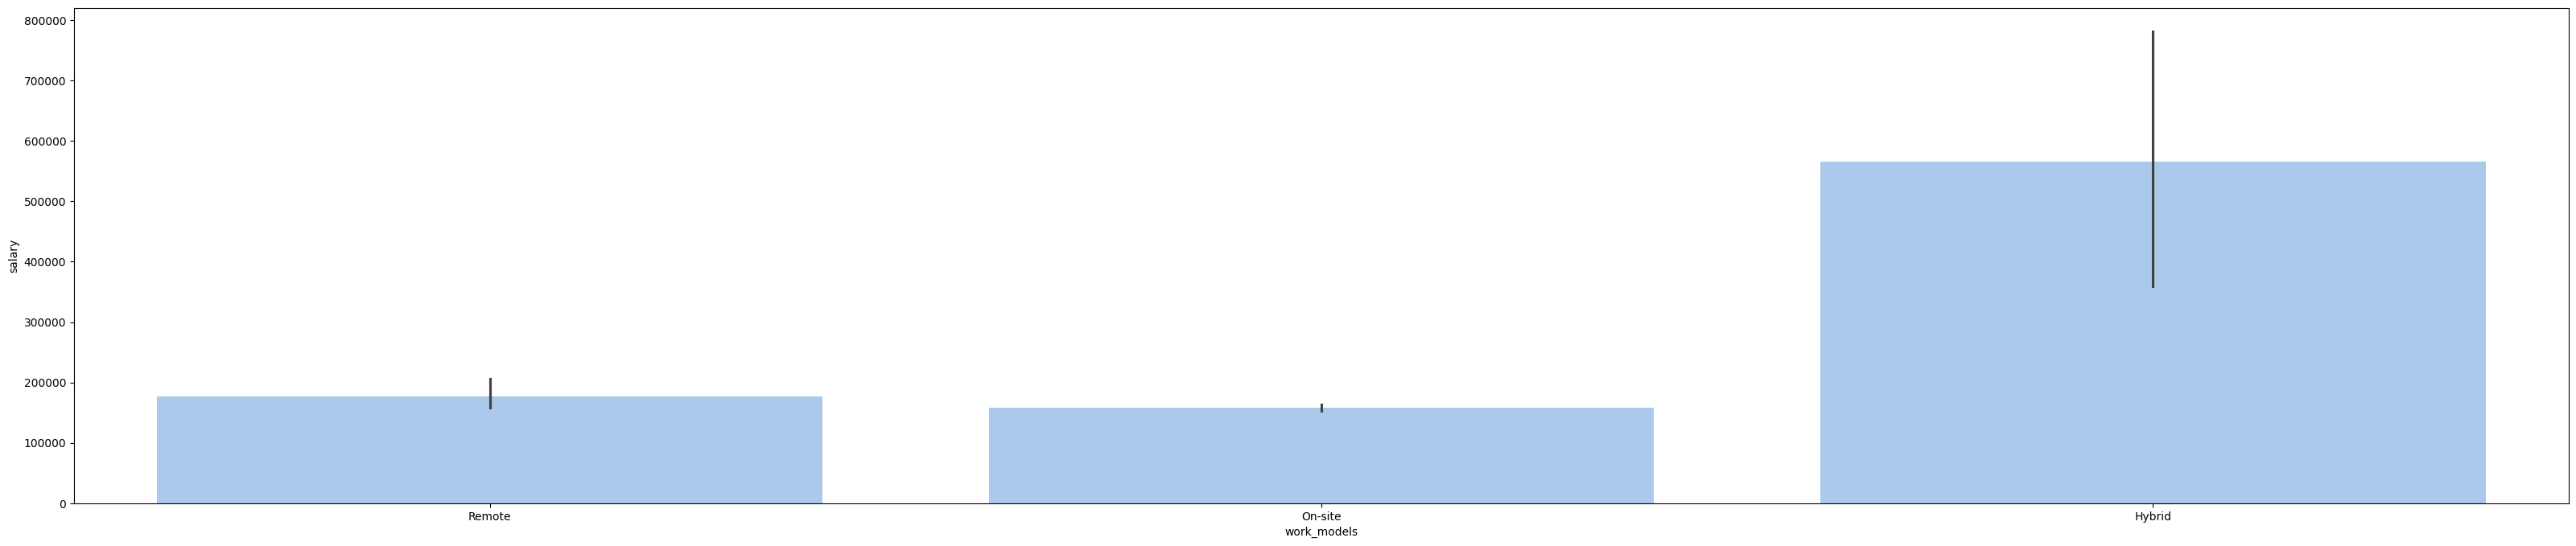

In [49]:
plt.figure(figsize=(40, 8))
sns.barplot(x='work_models', y='salary', data=df)

<Axes: xlabel='work_models', ylabel='salary_in_usd'>

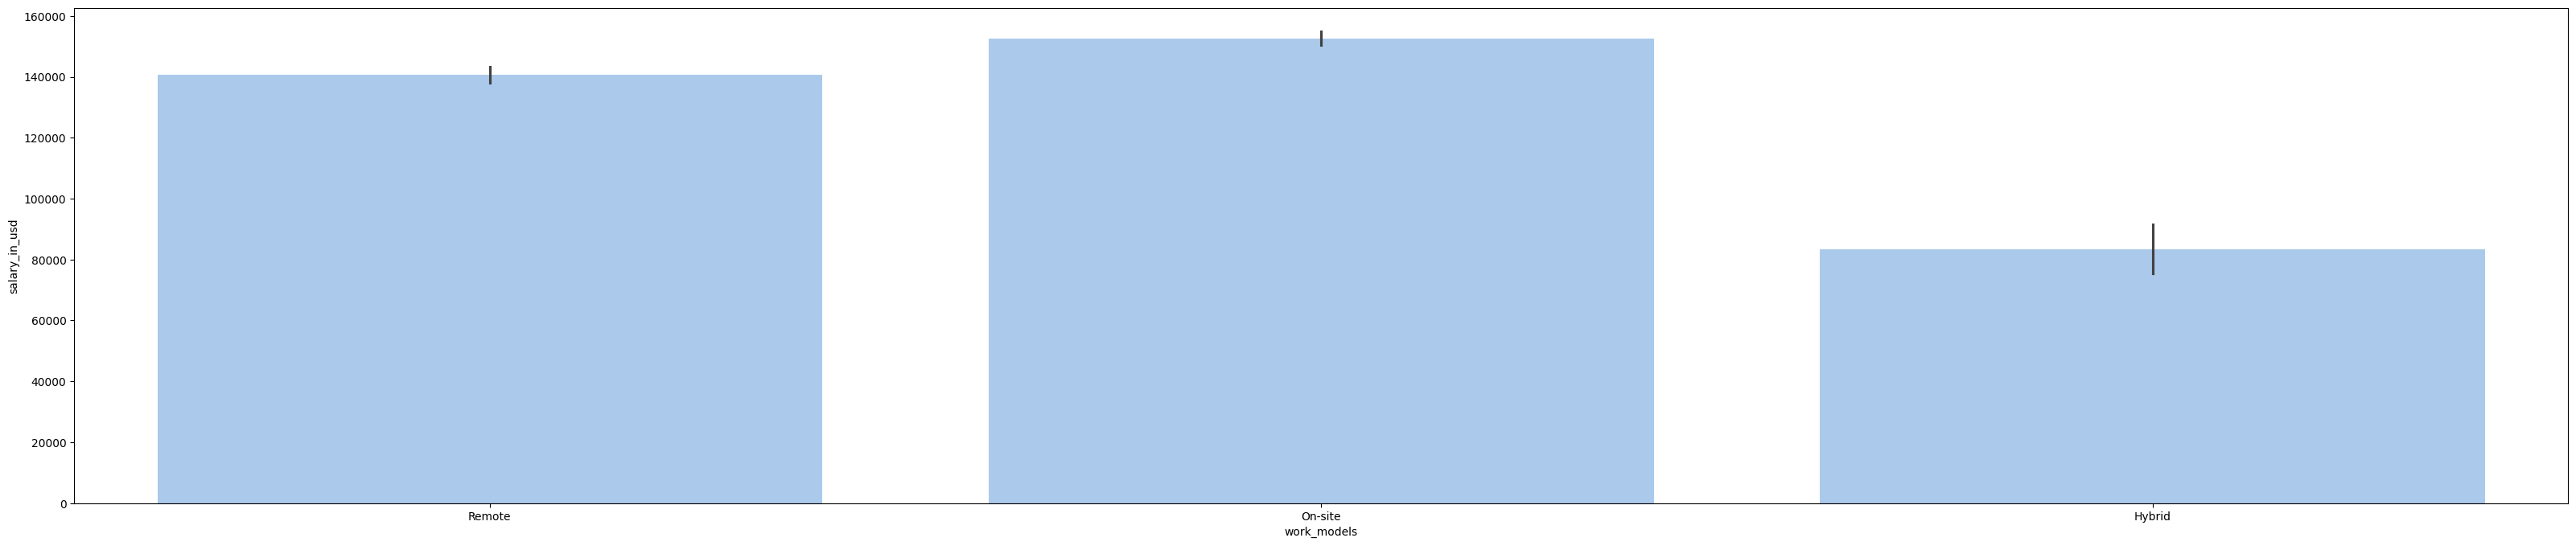

In [50]:
plt.figure(figsize=(40, 8))
sns.barplot(x='work_models', y='salary_in_usd', data=df)

#1.12 Modelos de trabalho e ano de trabalho

<Axes: xlabel='work_models', ylabel='work_year'>

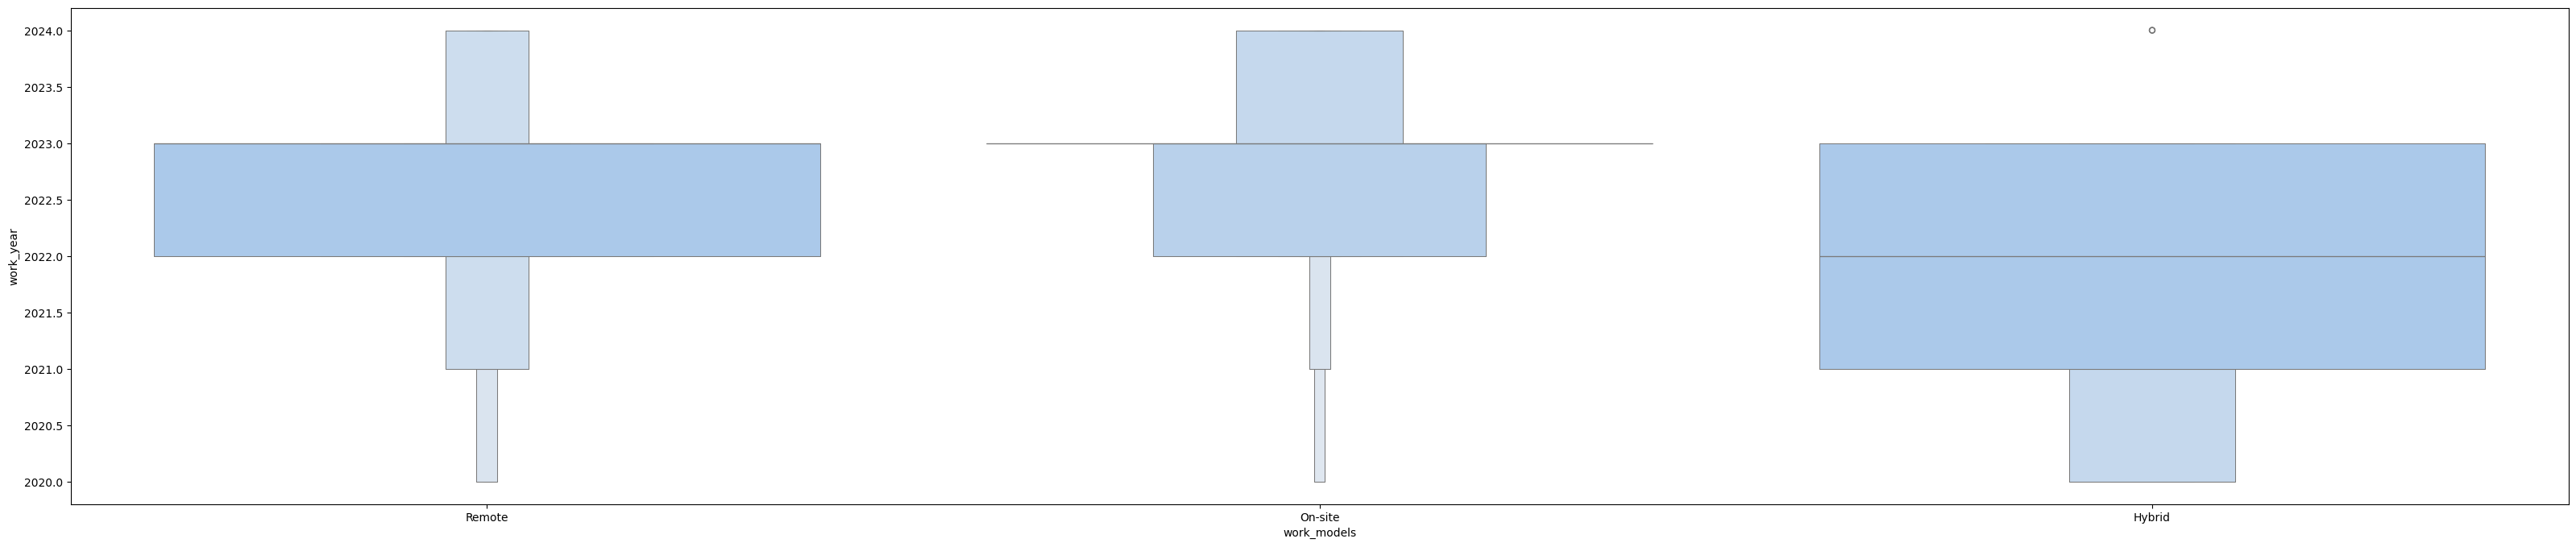

In [51]:
plt.figure(figsize=(40, 8))
sns.boxenplot(x='work_models', y='work_year', data=df)

#1.13 Media de salario por profissão e localidade.

In [52]:
job_title_means = [(i, np.mean(df['salary'][(df['job_title']==i) & (df['employee_residence']=='United States')])) for i in df['job_title'].unique()]

sorted_job_title_means = sorted(job_title_means, key=lambda x: x[1], reverse=True)

for title, mean_salary in sorted_job_title_means:
    if not np.isnan(mean_salary):
       print(f'A media salarial de {title} Nos Estados Unidos é {mean_salary:.2f}')

A media salarial de Managing Director Data Science Nos Estados Unidos é 280000.00
A media salarial de Head of Machine Learning Nos Estados Unidos é 259000.00
A media salarial de AWS Data Architect Nos Estados Unidos é 258000.00
A media salarial de Head of Data Science Nos Estados Unidos é 224539.29
A media salarial de Machine Learning Software Engineer Nos Estados Unidos é 215622.22
A media salarial de Software Data Engineer Nos Estados Unidos é 210000.00
A media salarial de Deep Learning Engineer Nos Estados Unidos é 189236.67
A media salarial de Machine Learning Manager Nos Estados Unidos é 175000.00
A media salarial de Data Operations Engineer Nos Estados Unidos é 151241.67
A media salarial de Applied Machine Learning Scientist Nos Estados Unidos é 188800.00
A media salarial de Applied Machine Learning Engineer Nos Estados Unidos é 177500.00
A media salarial de Cloud Database Engineer Nos Estados Unidos é 155000.00
A media salarial de Data Operations Manager Nos Estados Unidos é 136

In [53]:
job_title_means = [(i, np.mean(df['salary'][(df['job_title']==i) & (df['employee_residence']=='Brazil')])) for i in df['job_title'].unique()]

sorted_job_title_means = sorted(job_title_means, key=lambda x: x[1], reverse=True)

for title, mean_salary in sorted_job_title_means:
    if not np.isnan(mean_salary):
        print(f'A média salarial de {title} no Brasil é {mean_salary}')

A média salarial de Data Scientist no Brasil é 84850.0
A média salarial de Data Engineer no Brasil é 63000.0
A média salarial de MLOps Engineer no Brasil é 140400.0
A média salarial de Analytics Engineer no Brasil é 63000.0
A média salarial de Computer Vision Engineer no Brasil é 63000.0
A média salarial de BI Analyst no Brasil é 63000.0
A média salarial de Head of Data no Brasil é 112500.0
A média salarial de Cloud Data Engineer no Brasil é 160000.0
A média salarial de Principal Machine Learning Engineer no Brasil é 195000.0


Nos códigos acima, apresentamos as médias salariais nos Estados Unidos e no Brasil. Observamos a disparidade nas áreas que não possuem registros neste conjunto de dados em relação ao Brasil. Adicionalmente, ajustamos para não exibir valores NaN caso não haja informação salarial para determinada área, evitando assim uma apresentação poluída.

<Axes: title={'center': 'Relação entre Ano de Trabalho e Salário para Data Scientist nos Estados Unidos'}, xlabel='work_year', ylabel='salary'>

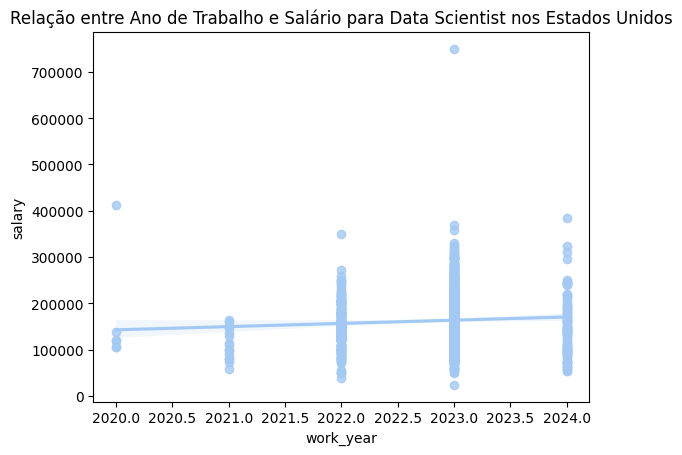

In [54]:
plt.title("Relação entre Ano de Trabalho e Salário para Data Scientist nos Estados Unidos")

sns.regplot(x=df['work_year'][(df['job_title']=='Data Scientist') & (df['employee_residence']=='United States')],
            y=df['salary'][(df['job_title']=='Data Scientist') & (df['employee_residence']=='United States')],)

Text(0.5, 1.0, 'Relação entre Ano de Trabalho e Salário para Data Engineer nos Estados Unidos')

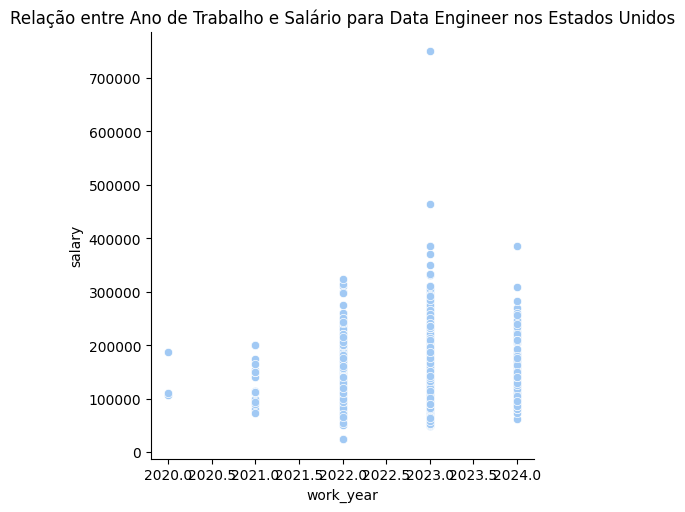

In [55]:
sns.relplot(x=df['work_year'][(df['job_title']=='Data Engineer') & (df['employee_residence']=='United States')],
            y=df['salary'][(df['job_title']=='Data Engineer') & (df['employee_residence']=='United States')])

plt.title("Relação entre Ano de Trabalho e Salário para Data Engineer nos Estados Unidos")

Text(0.5, 1.0, 'Relação entre Ano de Trabalho e Salário para ML Engineer nos Estados Unidos')

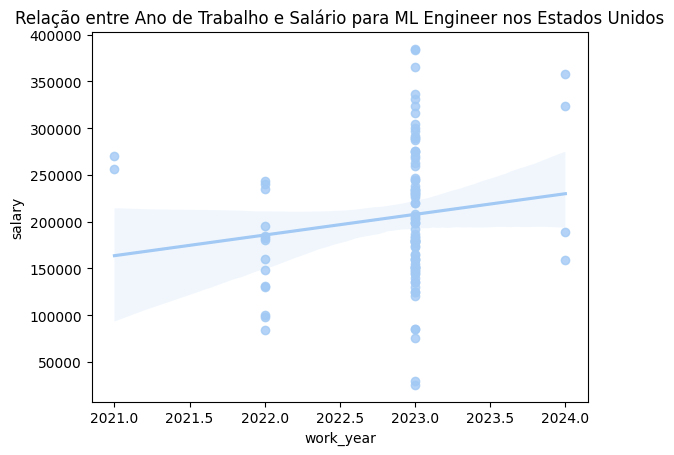

In [56]:
sns.regplot(x=df['work_year'][(df['job_title']=='ML Engineer') & (df['employee_residence']=='United States')],
            y=df['salary'][(df['job_title']=='ML Engineer') & (df['employee_residence']=='United States')],)

plt.title("Relação entre Ano de Trabalho e Salário para ML Engineer nos Estados Unidos")


Text(0.5, 1.0, 'Relação entre Ano de Trabalho e Salário para Data Analysts nos Estados Unidos')

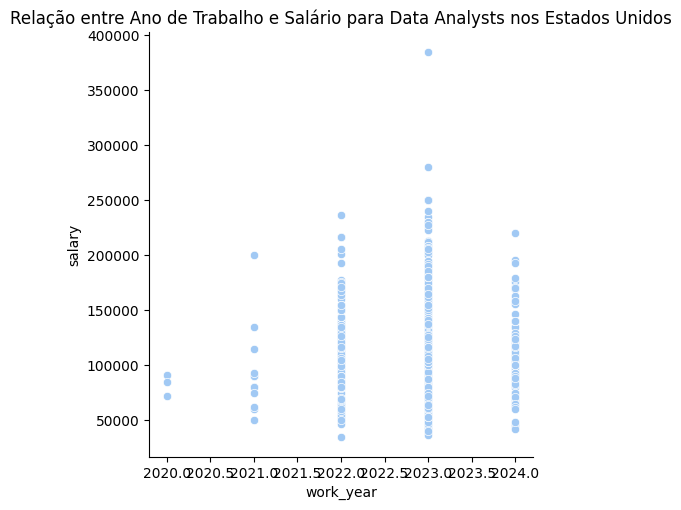

In [57]:
sns.relplot(x=df['work_year'][(df['job_title']=='Data Analyst') & (df['employee_residence']=='United States')],
            y=df['salary'][(df['job_title']=='Data Analyst') & (df['employee_residence']=='United States')],)

plt.title("Relação entre Ano de Trabalho e Salário para Data Analysts nos Estados Unidos")


<Axes: title={'center': 'Relação entre Ano de Trabalho e Salário para Data Analysts nos Estados Unidos'}, xlabel='work_year', ylabel='salary'>

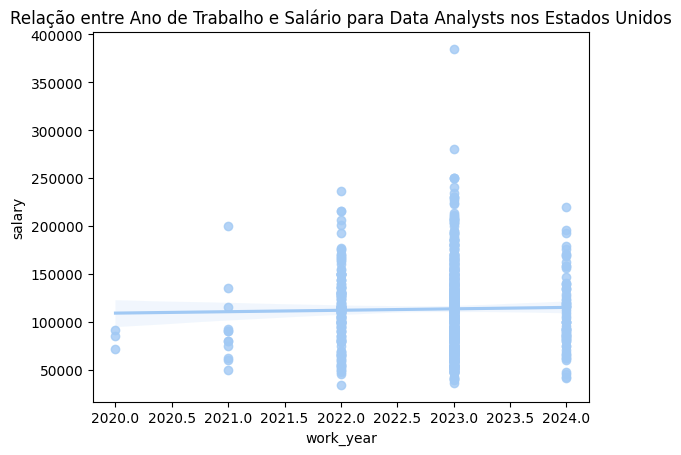

In [58]:
plt.title("Relação entre Ano de Trabalho e Salário para Data Analysts nos Estados Unidos")

sns.regplot(x=df['work_year'][(df['job_title']=='Data Analyst') & (df['employee_residence']=='United States')],
            y=df['salary'][(df['job_title']=='Data Analyst') & (df['employee_residence']=='United States')],)


In [59]:
cols = ['work_year', 'experience_level', 'employee_residence', 'work_models', 'company_location', 'company_size', 'employment_type']
groups = {}

for col in cols:
    groups[col] = df\
        .groupby(col, as_index=False)\
        .agg({'salary_in_usd': 'mean'})

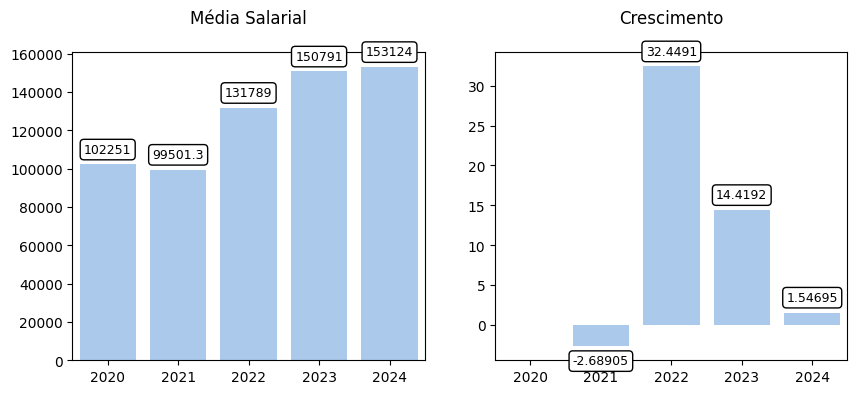

In [60]:
sns.set_palette("pastel") # CORES PADRÕES GRAFICOS

def values(grafico): # FUNÇÃO PLOTAR VALORES BAR PLOT
    for container in grafico.containers:
        grafico.bar_label(container, label_type="edge", color="black",
                     padding=6,
                     fontsize=9,
                     bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})



# CRESCIMENTO POR ANO
groups['work_year']['crescimento'] = groups['work_year']['salary_in_usd'].pct_change().mul(100)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
g1 = sns.barplot(ax=ax[0], data=groups['work_year'], x='work_year', y='salary_in_usd')
g2 = sns.barplot(ax=ax[1], data=groups['work_year'], x='work_year', y='crescimento')

values(g1)
values(g2)

ax[0].set_title('Média Salarial\n')
ax[1].set_title('Crescimento\n')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

No gráfico da esquerda, você pode observar visualmente como os salários médios mudaram ao longo dos anos.
No gráfico da direita, a taxa de crescimento percentual proporciona insights sobre o aumento ou redução percentual nos salários de um ano para o próximo.
Ambos os gráficos em conjunto permitem uma análise comparativa do crescimento salarial ao longo dos anos, proporcionando uma compreensão visual das tendências salariais na área de dados.

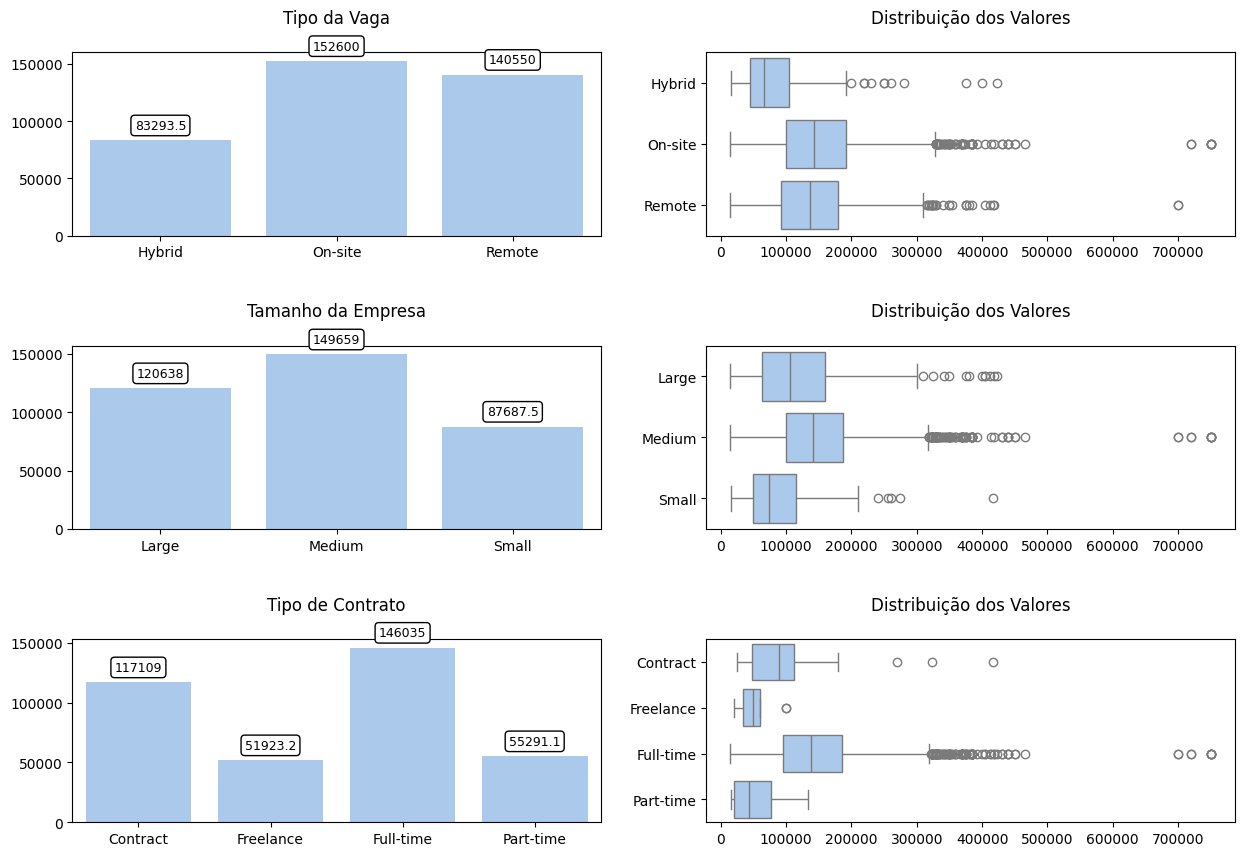

In [62]:
fig, ax = plt.subplots(3, 2, figsize=(15,10))

g1 = sns.barplot(ax=ax[0,0], data=groups['work_models'].sort_values(by='work_models'), x='work_models', y='salary_in_usd')
sns.boxplot(ax=ax[0,1], data=df.sort_values(by='work_models'), x='salary_in_usd', y='work_models')
ax[0,0].set_title('Tipo da Vaga\n')
ax[0,1].set_title('Distribuição dos Valores\n')

g2 = sns.barplot(ax=ax[1,0], data=groups['company_size'].sort_values(by='company_size'), x='company_size', y='salary_in_usd')
sns.boxplot(ax=ax[1,1], data=df.sort_values(by='company_size'), x='salary_in_usd', y='company_size')
ax[1,0].set_title('Tamanho da Empresa\n')
ax[1,1].set_title('Distribuição dos Valores\n')

g3 = sns.barplot(ax=ax[2,0], data=groups['employment_type'].sort_values(by='employment_type'), x='employment_type', y='salary_in_usd')
sns.boxplot(ax=ax[2,1], data=df.sort_values(by='employment_type'), x='salary_in_usd', y='employment_type')
ax[2,0].set_title('Tipo de Contrato\n')
ax[2,1].set_title('Distribuição dos Valores\n')

values(g1)
values(g2)
values(g3)

ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[2,0].set_ylabel('')
ax[2,0].set_xlabel('')
ax[2,1].set_ylabel('')
ax[2,1].set_xlabel('')


plt.subplots_adjust(hspace=0.6)
plt.show()

Esses gráficos representam uma análise da relação entre o tipo de vaga, o tamanho da empresa e o tipo de contrato com os salários na área de dados.



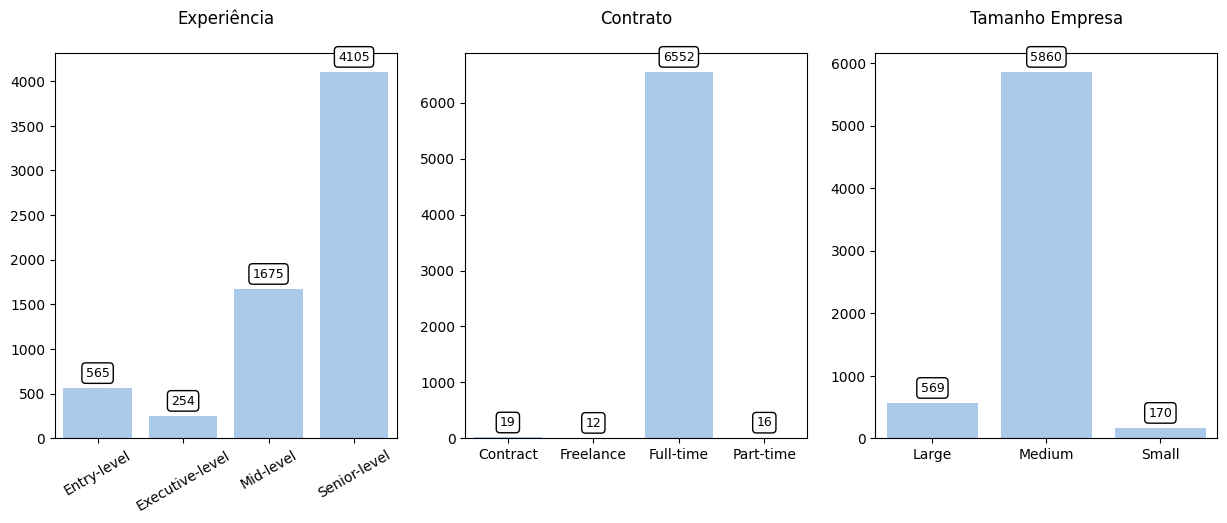

In [63]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

g1 = sns.countplot(ax=ax[0], data=df.sort_values(by='experience_level'), x='experience_level')
g2 = sns.countplot(ax=ax[1], data=df.sort_values(by='employment_type'), x='employment_type')
g3 = sns.countplot(ax=ax[2], data=df.sort_values(by='company_size'), x='company_size')

ax[0].set_title('Experiência\n')
ax[1].set_title('Contrato\n')
ax[2].set_title('Tamanho Empresa\n')

values(g1)
values(g2)
values(g3)

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)

plt.show()

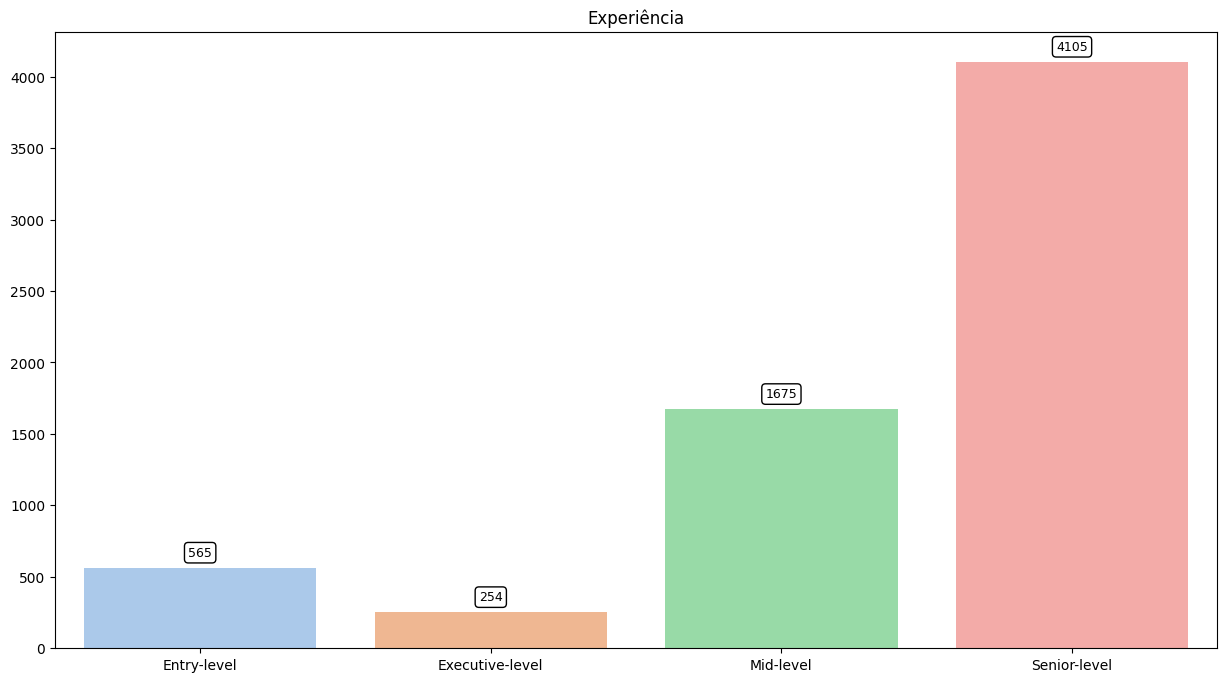

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
g1 = sns.countplot(ax=ax, data=df.sort_values(by='experience_level'), x='experience_level', hue='experience_level')
ax.set_title('Experiência')
ax.set_xlabel('')
ax.set_ylabel('')
values(g1)
plt.show()


#2 CORRELAÇÃO E SIGNIFICÂNCIA
# 2.1 DISPERSÃO E REGRESSÃO LINEAR

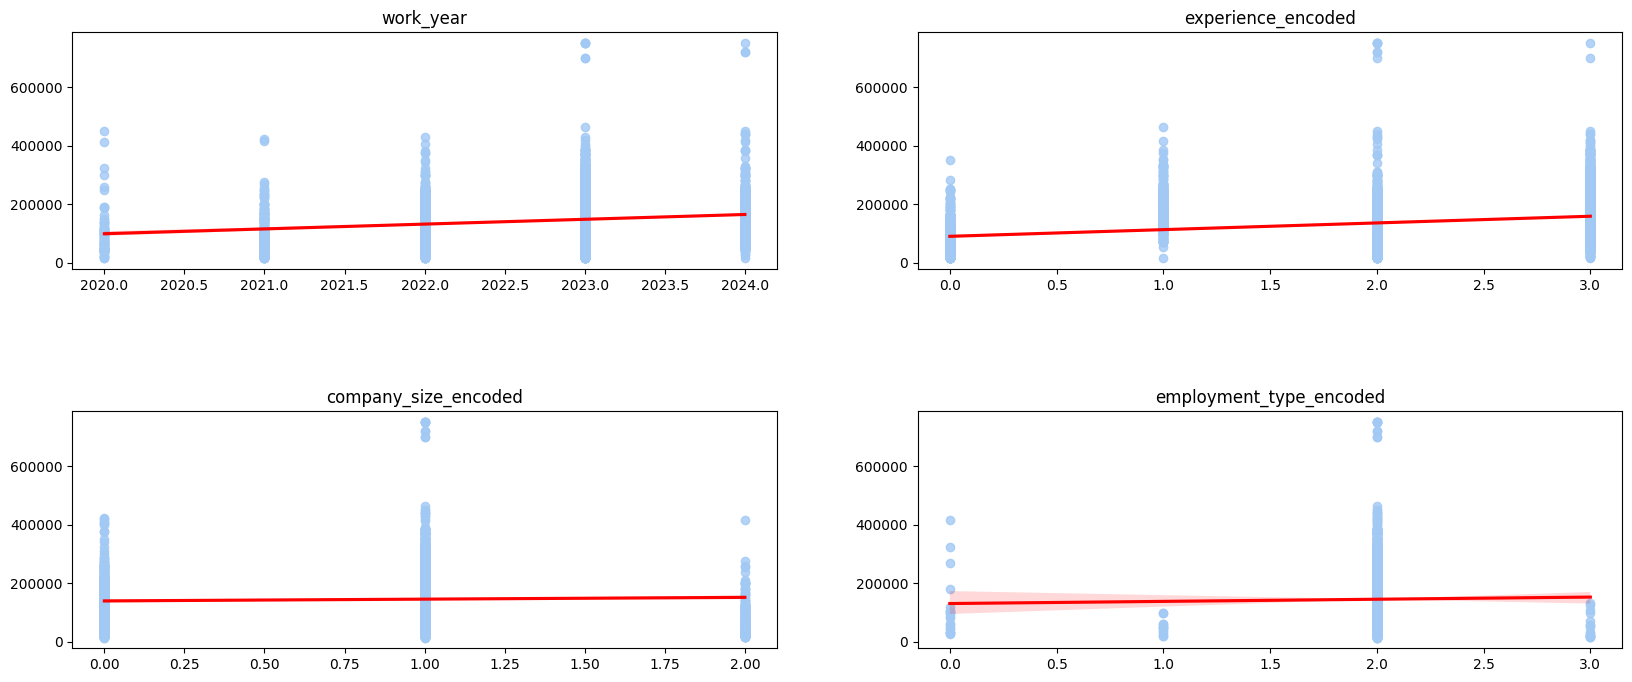

In [65]:
from sklearn.preprocessing import LabelEncoder

df['experience_encoded'] = LabelEncoder().fit_transform(X=df['experience_level'])
df['company_size_encoded'] = LabelEncoder().fit_transform(X=df['company_size'])
df['employment_type_encoded'] = LabelEncoder().fit_transform(X=df['employment_type'])

cols = ['work_year', 'experience_encoded', 'company_size_encoded', 'employment_type_encoded']

fig, ax = plt.subplots(2,2, figsize=(20,8))
n = 0
for i, col in enumerate(cols):
    if i % 2 == 0:
        sns.regplot(ax=ax[n,0], data=df, x=col, y='salary_in_usd', line_kws={'color':'red'})
        sns.regplot(ax=ax[n,1], data=df, x=cols[i+1], y='salary_in_usd', line_kws={'color':'red'})
        ax[n,0].set_title(col)
        ax[n,0].set_xlabel('')
        ax[n,0].set_ylabel('')
        ax[n,1].set_title(cols[i+1])
        ax[n,1].set_xlabel('')
        ax[n,1].set_ylabel('')
        n += 1

plt.subplots_adjust(hspace=0.6)
plt.show()

A linha vermelha em cada gráfico representa a tendência geral da relação entre a variável específica e o salário.
Esses gráficos são úteis para visualizar como diferentes variáveis estão correlacionadas com os salários na área de dados.

#2.2 CORRELAÇÃO DE PEARSON

WORK_YEAR            | STATISTICS   0.1560 | PVALUE       0.0000 | SIGNIFICATIVA       
SALARY               | STATISTICS   0.0433 | PVALUE       0.0004 | SIGNIFICATIVA       
SALARY_IN_USD        | STATISTICS   1.0000 | PVALUE       0.0000 | SIGNIFICATIVA       
EXPERIENCE_ENCODED   | STATISTICS   0.2940 | PVALUE       0.0000 | SIGNIFICATIVA       
COMPANY_SIZE_ENCODED | STATISTICS   0.0282 | PVALUE       0.0221 | SIGNIFICATIVA       
EMPLOYMENT_TYPE_ENCODED | STATISTICS   0.0130 | PVALUE       0.2928 | NÃO SIGNIFICATIVA   


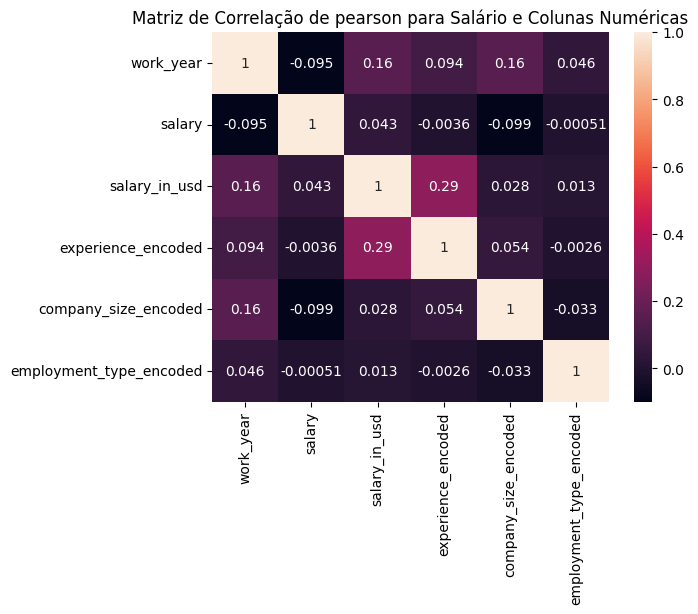

In [66]:
from scipy.stats import pearsonr
import seaborn as sns

# Filtrar apenas colunas numéricas
numeric_columns = df.select_dtypes(include='number')

# Iterar sobre colunas numéricas
for col in numeric_columns.columns:
    dados = pearsonr(df['salary_in_usd'], numeric_columns[col])

    if dados[1] > .05:
        status = 'NÃO SIGNIFICATIVA'
    else:
        status = 'SIGNIFICATIVA'
    print(f'{col.upper():<20} | STATISTICS {dados[0]:>8.4f} | PVALUE {dados[1]:>12.4f} | {status:<20}')

# Visualizar a matriz de correlação
plt.title("Matriz de Correlação de pearson para Salário e Colunas Numéricas")
sns.heatmap(numeric_columns.corr(method='pearson'), annot=True);

Uma análise de correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis contínuas. Fornecendo um coeficiente de correlação que varia de -1 a 1, indicando a força e a direção da relação entre as variáveis.

Coeficiente de Correlação (r):

r = 1: Correlação perfeita positiva (à medida que uma variável aumenta, a outra também aumenta de maneira linear).
r = -1: Correlação perfeita negativa (à medida que uma variável aumenta, a outra diminui de maneira linear).
r = 0: Ausência de correlação linear.
Interpretação:

Quanto mais próximo de 1 (positivo) ou -1 (negativo), mais forte é a correlação. Quanto mais próximo de 0, mais fraca é a correlação. Direção:

Positiva: Aumento em uma variável está associado ao aumento na outra.

Negativa: Aumento em uma variável está associado à diminuição na outra.

Exemplo de Interpretação:

Se tivermos um coeficiente de correlação de 0.8 entre a experiência profissional e o salário, isso sugere uma correlação positiva forte. Ou seja, à medida que a experiência profissional aumenta, é provável que o salário também aumente.

A correlação de Pearson avalia apenas relações lineares. Outliers podem influenciar significativamente o resultado. Correlação não implica causalidade. Ao realizar uma análise de correlação de Pearson, é essencial considerar o contexto, interpretar os resultados com cautela e explorar visualmente os dados para uma compreensão abrangente da relação entre as variáveis. Essa análise é valiosa para identificar padrões lineares e fornecer insights sobre a possível associação entre as variáveis em estudo.

#2.3 CORRELAÇÃO DE SPEARMAN

WORK_YEAR            | STATISTICS   0.1373 | PVALUE       0.0000 | SIGNIFICATIVA       
SALARY               | STATISTICS   0.9336 | PVALUE       0.0000 | SIGNIFICATIVA       
SALARY_IN_USD        | STATISTICS   1.0000 | PVALUE       0.0000 | SIGNIFICATIVA       
EXPERIENCE_ENCODED   | STATISTICS   0.3554 | PVALUE       0.0000 | SIGNIFICATIVA       
COMPANY_SIZE_ENCODED | STATISTICS   0.0388 | PVALUE       0.0016 | SIGNIFICATIVA       
EMPLOYMENT_TYPE_ENCODED | STATISTICS   0.0156 | PVALUE       0.2045 | NÃO SIGNIFICATIVA   


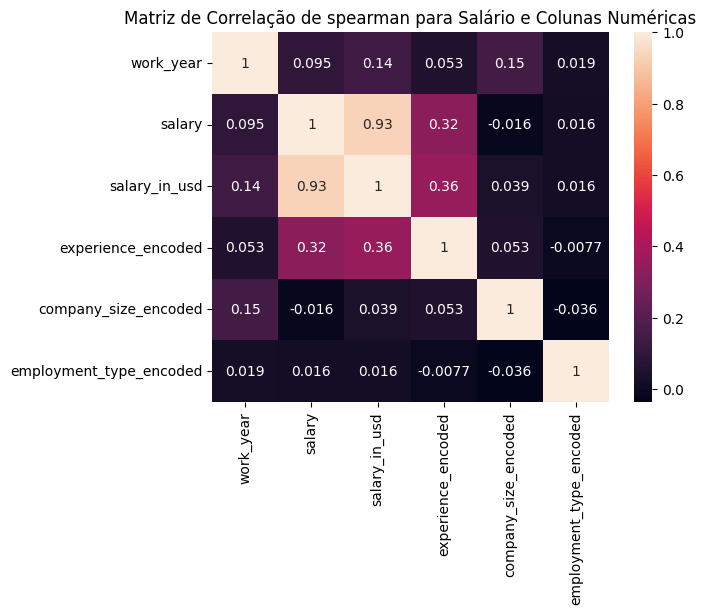

In [67]:
from scipy.stats import spearmanr

for col in numeric_columns.columns:
    dados = spearmanr(df['salary_in_usd'], numeric_columns[col])

    if dados[1] > .05:
        status = 'NÃO SIGNIFICATIVA'
    else:
        status = 'SIGNIFICATIVA'
    print(f'{col.upper():<20} | STATISTICS {dados[0]:>8.4f} | PVALUE {dados[1]:>12.4f} | {status:<20}')

# Filtrar apenas colunas numéricas para a matriz de correlação
numeric_columns_for_heatmap = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação de Spearman apenas para colunas numéricas
corr_matrix = numeric_columns_for_heatmap.corr(method='spearman')

# Criar um mapa de calor
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de Correlação de spearman para Salário e Colunas Numéricas")
plt.show()

Objetivo com essa avaliação de correlação é avaliar a relação monotônica (não necessariamente linear) entre duas variáveis. Que é recomendada quando as variáveis não têm uma relação linear, mas mantêm uma relação consistente, mesmo que não seja estritamente uma linha reta. Quanto mais próximo de 1 (positivo) ou -1 (negativo), mais forte é a correlação. Quanto mais próximo de 0, mais fraca é a correlação. Coeficiente de Correlação (ρ - rho): ρ = 1: Correlação perfeita positiva monotônica. ρ = -1: Correlação perfeita negativa monotônica. ρ = 0: Ausência de correlação monotônica.

#2.4 CORRELAÇÃO DE KENDALL

WORK_YEAR            | STATISTICS   0.1080 | PVALUE       0.0000 | SIGNIFICATIVA       
SALARY               | STATISTICS   0.9352 | PVALUE       0.0000 | SIGNIFICATIVA       
SALARY_IN_USD        | STATISTICS   1.0000 | PVALUE       0.0000 | SIGNIFICATIVA       
EXPERIENCE_ENCODED   | STATISTICS   0.2813 | PVALUE       0.0000 | SIGNIFICATIVA       
COMPANY_SIZE_ENCODED | STATISTICS   0.0312 | PVALUE       0.0017 | SIGNIFICATIVA       
EMPLOYMENT_TYPE_ENCODED | STATISTICS   0.0128 | PVALUE       0.2038 | NÃO SIGNIFICATIVA   


Text(0.5, 1.0, 'Matriz de Correlação de Kendall para Salário e Colunas Numéricas')

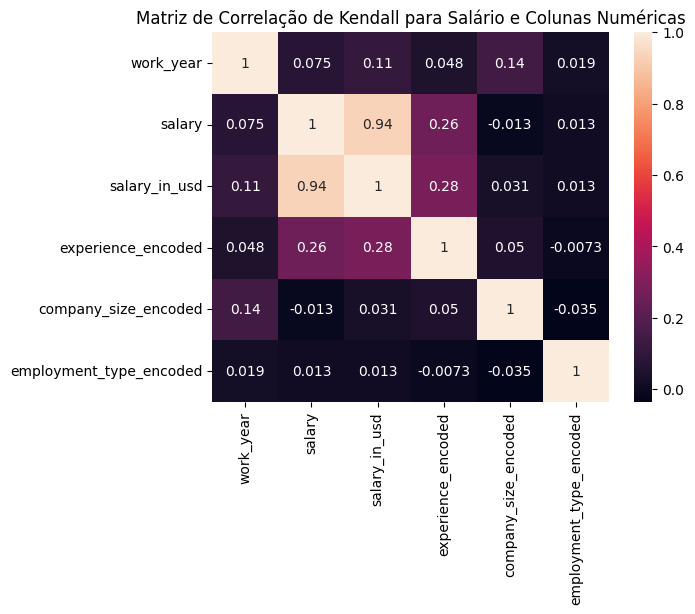

In [68]:
from scipy.stats import kendalltau

for col in numeric_columns.columns:
    dados = kendalltau(df['salary_in_usd'], numeric_columns[col])

    if dados[1] > .05:
        status = 'NÃO SIGNIFICATIVA'
    else:
        status = 'SIGNIFICATIVA'
    print(f'{col.upper():<20} | STATISTICS {dados[0]:>8.4f} | PVALUE {dados[1]:>12.4f} | {status:<20}')

# Filtrar apenas colunas numéricas para a matriz de correlação
numeric_columns_for_heatmap = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação de Spearman apenas para colunas numéricas
corr_matrix = numeric_columns_for_heatmap.corr(method='kendall')
sns.heatmap(df.corr(method='kendall'), annot=True);
plt.title("Matriz de Correlação de Kendall para Salário e Colunas Numéricas")

Correlação de Kendall, é similar à correlação de Spearman, a correlação de Kendall mede a concordância de classificações entre pares de observações. Ela é especialmente útil quando os dados são ordinais e a relação entre as variáveis é mais facilmente expressa em termos de ordem do que de magnitude absoluta. O coeficiente de correlação de Kendall também varia de -1 a 1, seguindo a mesma interpretação da correlação de Spearman. Racional para Escolher Spearman e Kendall:

# 3 Criação modelo predição

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

Agora para conseguirmos criar um modelo que faça a predição de um salario, importamos as bibliotecas necessarias para isso.

In [70]:
categorias = ['job_title', 'experience_level', 'work_models', 'work_year', 'employee_residence', 'company_location', 'company_size']
encoder = []
for i, j in enumerate(categorias):
    encoder.append(LabelEncoder())
    encoder[i].fit(df[j])
    df[j] = encoder[i].transform(df[j])

Separamos na variavel "categorias" as colunas que são interessantes para que possamos criar esse modelo.

In [71]:
# Separando os dados
x = df[categorias]
y = df.salary_in_usd
cv = KFold(n_splits=5, shuffle=True, random_state=42)

Separamos e dividimos os dados

In [72]:
# Usei uma lista de estimadores e determinei que 500 era o mais preciso
estimators = 500
forest_model = RandomForestRegressor(n_estimators = estimators, random_state=1)

# Cross validation
mse_scores = -cross_val_score(forest_model, x, y, scoring='neg_mean_absolute_error', cv=cv)
print(mse_scores)

# Como os mse_scores são todos semelhantes, este modelo é confiável
# Para criar o modelo mais preciso, treinarei todo o conjunto de dados

forest_model.fit(x, y)

[45479.69333911 41708.37482916 43767.13139947 42607.68986271
 42158.97216223]


RandomForestRegressor(n_estimators=500, random_state=1)

Acima definimos o numero de estimadores com o "n_estimators", que é o hiperparâmetro que define o número de árvores na floresta, tendo definido nele o numero de 500 arvores aleatorias.

In [73]:
# Ajuste suas estatísticas aqui:

your_job = {'job_title' : 'Machine Learning Engineer', 'experience_level' : 'Executive-level',
            'work_models' : 'Remote', 'work_year' : 2024,
            'employee_residence' : 'United States', 'company_location' : 'United States',
            'company_size' : 'Large'
           }

# Transforme dicionário em array 2D
a = np.zeros(shape = (1, 7))
for i, j in enumerate(categorias):
    a[0][i] = encoder[i].transform([your_job[j]])

# Insira a matriz no modelo
prediction = int(forest_model.predict(a))
print('Seu salario esperado é de', prediction, 'USD!')

Seu salario esperado é de 207576 USD!


Neste ambiente interativo, temos a flexibilidade de explorar e ajustar os dados conforme desejado. Podemos personalizar variáveis como o nome da vaga, o nível de experiência, o modelo de trabalho, o ano, a localização de residência, o tamanho e a localização da empresa. Ao fazer essas personalizações, o modelo pode gerar uma previsão do salário esperado com base nas características escolhidas. Isso proporciona uma maneira dinâmica e interativa de experimentar diferentes cenários e entender como diferentes fatores podem influenciar a estimativa salarial.

# Habilidades para Ciência de Dados.


Para aprofundar nossa compreensão na área de dados, integrei um segundo conjunto de dados contendo informações cruciais. Este conjunto [Data Science Job Postings & Skills (2024)](https://www.kaggle.com/datasets/asaniczka/data-science-job-postings-and-skills/data), inclui a coluna "job_link", que fornece o link direto para a vaga em análise, e a coluna "job_skills". A ênfase nesta análise está na coluna "job_skills", pois ela desempenha um papel fundamental ao nos revelar as habilidades mais requisitadas no mercado de trabalho. Essa abordagem visa identificar as competências-chave que são essenciais para aumentar nossas chances de sucesso em um campo que está em constante evolução. A análise dessas habilidades proporcionará insights valiosos para quem busca se destacar no dinâmico mercado de trabalho da ciência de dados.

## Conteudo e estrutura

  job_link:   Coluna com o o link para a vaga.
  
  job_skills: Coluna com as habilidades exigidas pela vaga

Começamos nossa analise importando os datasets para que possamos dar inicio a nossa analise das habilidades.

In [74]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-salaries/data_science_salaries.csv
/kaggle/input/data-science-job-postings-and-skills/job_summary.csv
/kaggle/input/data-science-job-postings-and-skills/job_postings.csv
/kaggle/input/data-science-job-postings-and-skills/job_skills.csv


In [75]:
df_skills = pd.read_csv("/kaggle/input/data-science-job-postings-and-skills/job_skills.csv")
df_skills

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."
...,...,...
12212,https://uk.linkedin.com/jobs/view/data-reporti...,"Dashboard development, Reporting, Power BI, SQ..."
12213,https://www.linkedin.com/jobs/view/corporate-a...,"Investigation, Antimoney laundering, Fraud, Ba..."
12214,https://www.linkedin.com/jobs/view/senior-data...,"Data Science, Quantitative Modeling, SQL, Data..."
12215,https://www.linkedin.com/jobs/view/senior-data...,"Data Engineering, Data Quality, SQL, Python, T..."


Importamos os dados e salvamos na varaivel "df_skills" para que possamos trabalhar esses dados

In [76]:
df_skills.isna().sum()

job_link      0
job_skills    5
dtype: int64

Assim como toa boa Analise exploratoria de dados, devemos começar conhecendo nossos dados, saber se existe algum valor nulo é um bom inicio.

In [77]:
df_skills.duplicated().sum()

0

In [78]:
df_skills = df_skills.dropna()

Como não temos como saber o que seria exigido pela vaga, optamos por nos desfazer das colunas com dados nulos, pois com elas não seria possivel continuar nossa analise

In [79]:
df_skills.columns

Index(['job_link', 'job_skills'], dtype='object')

In [80]:
df_skills['skill_count'] = df_skills['job_skills'].str.split(', ').apply(len)
df_skills

,job_link,job_skills,skill_count
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ...",27
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",23
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da...",27
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi...",41
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",17
...,...,...,...
12212,https://uk.linkedin.com/jobs/view/data-reporti...,"Dashboard development, Reporting, Power BI, SQ...",18
12213,https://www.linkedin.com/jobs/view/corporate-a...,"Investigation, Antimoney laundering, Fraud, Ba...",62
12214,https://www.linkedin.com/jobs/view/senior-data...,"Data Science, Quantitative Modeling, SQL, Data...",14
12215,https://www.linkedin.com/jobs/view/senior-data...,"Data Engineering, Data Quality, SQL, Python, T...",31


Esse código acima está criando uma nova coluna chamada "skill_count" no DataFrame "df_skills". A coluna "job_skills" contém informações sobre as habilidades necessárias para determinadas vagas de emprego.

In [81]:
skills = ''
for skill in df_skills.job_skills:
    skills += skill.lower()

Aqui estamos salvando todas as habilidades de forma separada em uma variavel chamada "skills"

In [82]:
skills = skills.split(', ')
skills[:10]

['machine learning',
 'programming',
 'python',
 'scala',
 'java',
 'data engineering',
 'distributed computing',
 'statistical modeling',
 'optimization',
 'data pipelines']

Aqui exibimos as 10 primeiras habilidades que estão nessa variavel "skills"

In [83]:
from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills

[('python', 4400),
 ('sql', 4220),
 ('communication', 2428),
 ('data analysis', 2334),
 ('data visualization', 2259),
 ('machine learning', 2026),
 ('tableau', 1644),
 ('aws', 1615),
 ('communication skills', 1607),
 ('project management', 1572),
 ('r', 1505),
 ('data modeling', 1427),
 ('spark', 1372),
 ('problem solving', 1363),
 ('data warehousing', 1316)]

Usamos a função "Counter" para que conte todas as aparições de cada habilidade e mostramos as 15 mais repetidas.

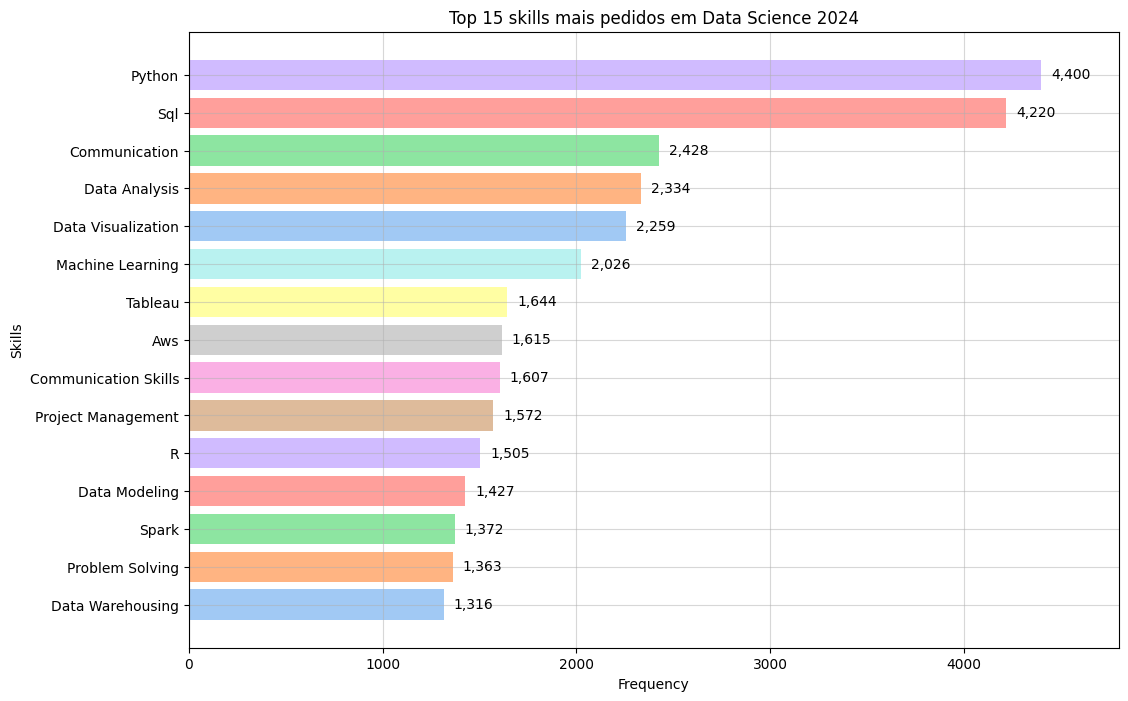

In [84]:
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("pastel"))

# Formatar o número com vírgulas e exibi-lo com uma pequena distância das barras
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 50
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center')

plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 15 skills mais pedidos em Data Science 2024')

# Mostrando as linhas verticais e horizontais
plt.grid(axis='both', linestyle='-', alpha=0.5)

# Muda o limete de x para o maximo de 4800
plt.xlim(0, 4800)
plt.show()

Antes de unificar os dados de hablidades, criamos um grafico para que possamos comparar o antes e o depois da contagem das habilidades.

In [85]:
top_2000 = counts.most_common(2000)
counter_2000 = Counter(dict(top_2000))

In [86]:
from difflib import SequenceMatcher, get_close_matches

# Função para mesclar rótulos semelhantes
def merge_similar_labels(counter_2000):
    merged_counts = {}
    merged = set()

    for label, count in counter_2000.items():
        if label in merged:
            continue

        # Encontre os rótulos mais semelhantes ao rótulo atual com similaridade superior a 90%
        similar_labels = get_close_matches(label, counter_2000.keys(), cutoff=0.85)

        # Escolha o rótulo mais adequado entre os rótulos semelhantes (o mais longo)
        chosen_label = min(similar_labels, key=len)

        # Soma das contagens de rótulos semelhantes e atribua-os ao rótulo escolhido
        merged_counts[chosen_label] = sum(counter_2000[l] for l in similar_labels)
        if (len(list(l for l in similar_labels)) > 1):
            print(list(l for l in similar_labels), len(list(l for l in similar_labels)))

        # Marcando as habilidades similares
        merged.update(similar_labels)

    return merged_counts

# Unindo as habilidades parecidas
merged_counts = merge_similar_labels(counter_2000)
len(merged_counts)

['python', 'python3'] 2
['sql', 'tsql'] 2
['communication', 'communications'] 2
['data analysis', 'data analytics', 'data analyst'] 3
['data visualization', 'data visualizations', 'data visualisation'] 3
['machine learning', 'machine learning (ml)'] 2
['communication skills', 'verbal communication skills', 'strong communication skills'] 3
['project management', 'product management', 'agile project management'] 3
['data modeling', 'data modelling', 'data model'] 3
['problem solving', 'problemsolving'] 2
['data warehousing', 'data warehouse'] 2
['data management', 'metadata management', 'database management'] 3
['analytical skills', 'analytic skills'] 2
['teamwork', 'team work'] 2
['data engineering', 'data engineer', 'database engineering'] 3
['power bi', 'powerbi'] 2
['business intelligence', 'business intelligence (bi)', 'business intelligence tools'] 3
['statistics', 'biostatistics'] 2
['data integration', 'data migration', 'data interpretation'] 3
["bachelor's degree", 'bachelors de

1728

In [87]:
merged_counts = Counter(merged_counts)
merged_counts.most_common(20)

[('python', 4440),
 ('sql', 4397),
 ('data analyst', 3417),
 ('communication', 2465),
 ('data visualization', 2328),
 ('problemsolving', 2319),
 ('machine learning', 2065),
 ('project management', 1725),
 ('communication skills', 1700),
 ('tableau', 1644),
 ('aws', 1615),
 ('data management', 1526),
 ('r', 1505),
 ('spark', 1372),
 ('powerbi', 1345),
 ('teamwork', 1247),
 ('java', 1237),
 ('analytic skills', 1194),
 ('data science', 1166),
 ('data governance', 1098)]

Assim como utilizamos os dados para unir as vagas no começo do trabalho, aqui fizemos a mesma coisa para unir as habilidades que podem ser as mesmas porem eescritas de maneira diferente.

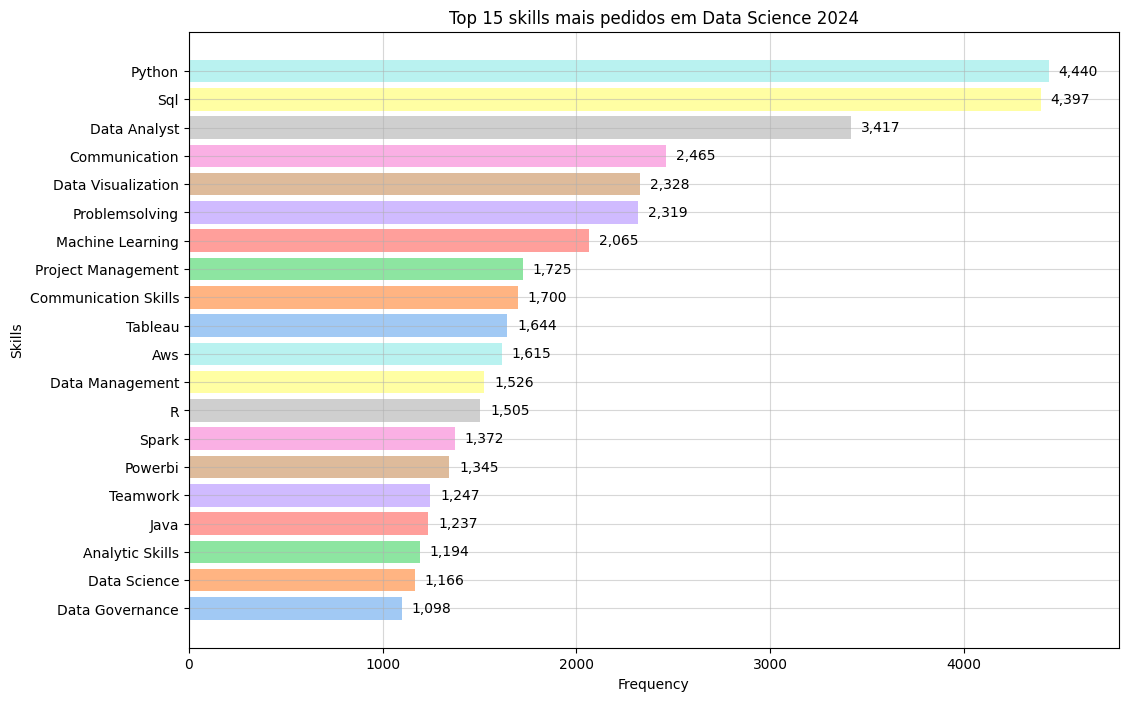

In [88]:
labels, values = zip(*merged_counts.most_common(20))
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("pastel"))

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 50
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center')

plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 15 skills mais pedidos em Data Science 2024')

# Mostra as linhas verticais e horizontais
plt.grid(axis='both', linestyle='-', alpha=0.5)

# Muda o limete de x para o maximo de 4800
plt.xlim(0, 4800)
plt.show()

Agora com os dados já unidos podemos ver quais são as 15 habilidades mais requisitadas e que se desenvolvermos teremos muito mais chances de conseguirmos uma vaga.

In [89]:
print(f"Você precisa em media de {df_skills.skill_count.median()} skills para aplicar a uma vaga de data science")

Você precisa em media de 24.0 skills para aplicar a uma vaga de data science


(0.0, 100.0)

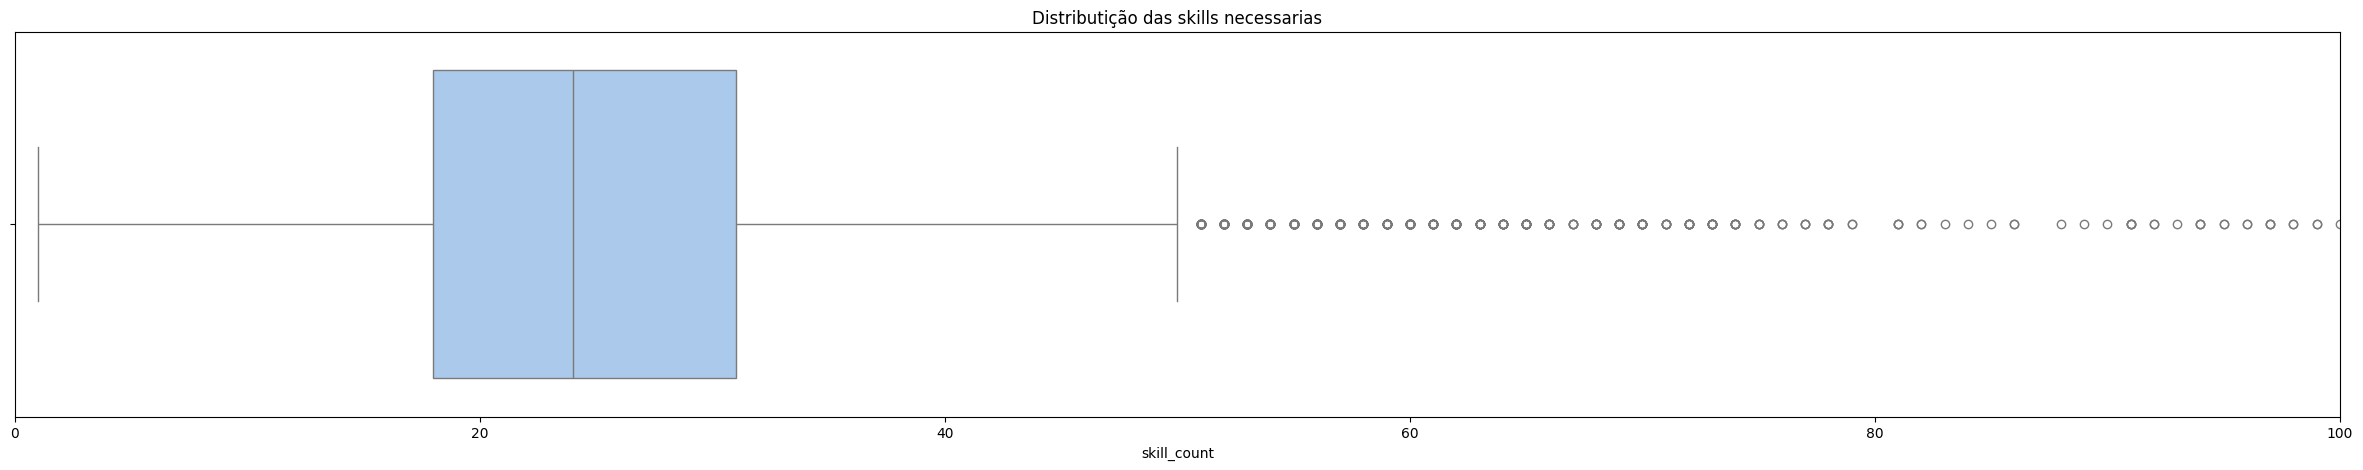

In [90]:
plt.figure(figsize=(30, 5))
sns.boxplot(data=df_skills, x='skill_count', orient='h', palette='pastel')
plt.title("Distributição das skills necessarias")
plt.xlim(0, 100)

Aqui usamos uma destribuição para ver em media quantas quantas habilidades são necessarias para preencer todos os requitos de vagas.

In [91]:
def plot_pie_chart(counts_dict, title="Popularidade"):


    explode = (0.05,) * len(counts_dict)

    fig, ax = plt.subplots(figsize=(10, 8))
    wedges, texts, autotexts = ax.pie(counts_dict.values(),
                                      autopct='%1.1f%%', startangle=90,
                                      colors=sns.color_palette('pastel'),
                                      explode=explode, shadow=True)

    # Prepare legend labels with counts
    legend_labels = [f'{key}: {value}' for key, value in counts_dict.items()]

    ax.legend(wedges, legend_labels,
              title="",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.setp(texts, size=12, weight="bold")

    plt.title(title, fontsize=18, fontweight='bold')
    plt.axis('equal')

    plt.show()



Aqui criamos outra função para facilitar a geração de codigos ao inves de criarmos os graficos todas as vezes, iremos criar uma função para que crie um grafico de pizza e que possamos comparar de maneira clara as habilidades que são mais requisitadas.

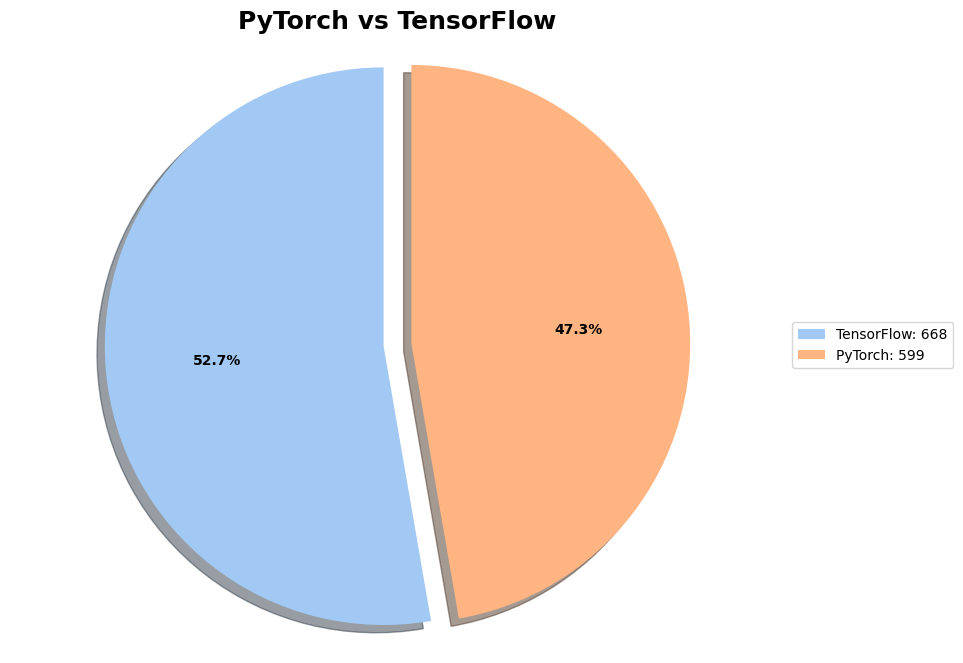

In [92]:
example_counts = {'TensorFlow': merged_counts['tensorflow'], 'PyTorch': merged_counts['pytorch']}
plot_pie_chart(example_counts, "PyTorch vs TensorFlow")

Ao analisar Pytorch vs TensorFlow, podemos ver quase um empate entre as duas, mas com a biblioteca TensoFlor aparecendo mais.

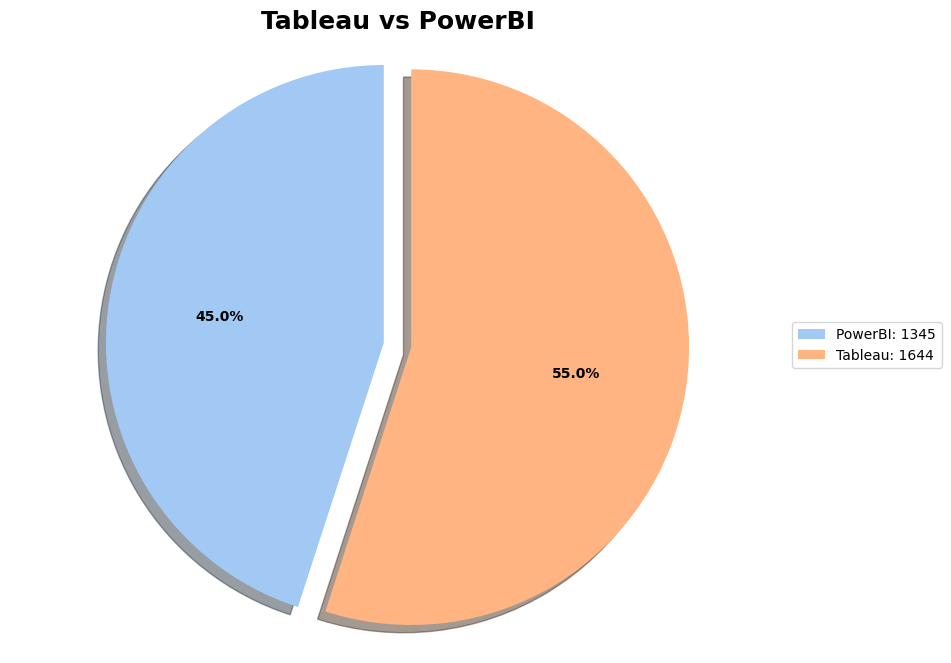

In [93]:
example_counts = {'PowerBI': merged_counts['powerbi'], 'Tableau': merged_counts['tableau']}
plot_pie_chart(example_counts, "Tableau vs PowerBI")

O mesmo ocorre com PowerBI vs Tableau, onde são duas ferramentas de bisness inteligence e o Tableau se saiu melhor por pouco.

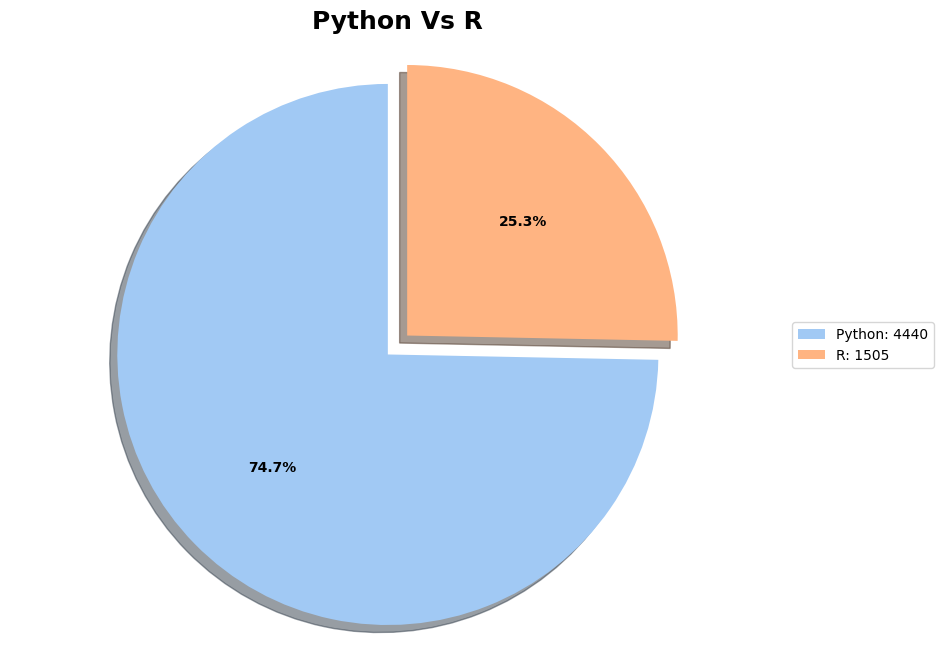

In [94]:
example_counts = {'Python': merged_counts['python'], 'R': merged_counts['r']}
plot_pie_chart(example_counts, "Python Vs R")

Já Python vs R é a disputa mais desequilibrada, onde em grande maioria exigem a linguagem de programação Python ao inves de R, mesmo ambas sendo muito conhecidas na area de Dados, Python por ser muito mais versatil sai ganhando nessa.

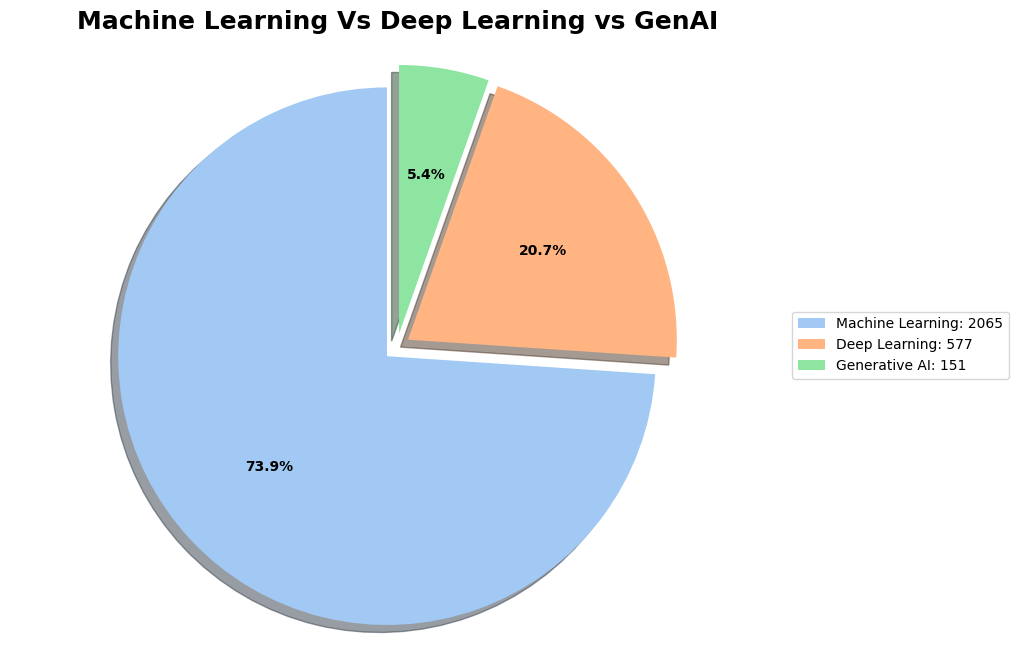

<Figure size 640x480 with 0 Axes>

In [95]:
example_counts = {'Machine Learning': merged_counts['machine learning'], 'Deep Learning': merged_counts['deep learning'], 'Generative AI': merged_counts['generative ai']}
plot_pie_chart(example_counts, "Machine Learning Vs Deep Learning vs GenAI")
plt.savefig('ml_vs_dl_popularity.png')

Na análise das áreas relacionadas à inteligência artificial, destaca-se a prevalência de "Machine Learning" como a habilidade mais requisitada, abrangendo impressionantes 73.9% das aparições nos requisitos das vagas. Em contrapartida, "Deep Learning" figura em segundo lugar, com pouco mais de 20%, seguido por "GenAI", que representa uma fatia menor, com 5.4%.

Vale ressaltar que o predomínio de "Machine Learning" pode ser atribuído à sua maturidade e estabelecimento no mercado, sendo uma área consolidada ao longo do tempo. Por outro lado, "Deep Learning" e "GenAI" são consideradas áreas mais recentes, refletindo uma demanda ainda em crescimento.

É interessante observar que a relativa menor procura por "Deep Learning" e "GenAI" pode ser influenciada pelo fato de serem áreas mais recentes, com as empresas ainda se adaptando e absorvendo essas tecnologias inovadoras. Contudo, essa dinâmica pode evoluir ao longo do tempo, à medida que essas áreas emergentes se tornam mais estabelecidas e integralizadas no cenário da inteligência artificial.

# Conclusão

Ao analisarmos o panorama da Ciência de Dados por meio de dados salariais e de habilidades requisitadas, insights valiosos emergem, iluminando o presente e antecipando tendências nesse campo dinâmico.

1. Mercado em Ação, a demanda por profissionais experientes em Ciência de Dados se mantém robusta, evidenciando a importância de expertise e maturidade nesse campo. A área também apresenta uma considerável margem para iniciantes, demonstrando a necessidade de novos talentos e a constante expansão do mercado.

2. Crescimento Contínuo e Habilidades Relevantes, a Ciência de Dados tende a crescer continuamente, impulsionada por novas tecnologias como o ChatGPT, que transformam o cenário e abrem novas oportunidades. A rápida evolução da área exige atualização contínua e busca por habilidades emergentes, como Machine Learning, Deep Learning e Big Data, para agregar valor à carreira.

3. A importância do Dataset fornece uma visão abrangente das faixas salariais e habilidades requisitadas em diferentes níveis de experiência, desde iniciantes até especialistas. Serve como guia para profissionais que desejam ingressar ou progredir na área, ajudando-os a tomar decisões estratégicas sobre sua carreira.
Auxílio para empresas: O dataset também auxilia empresas na definição de expectativas salariais competitivas e na identificação de habilidades essenciais para seus candidatos, otimizando seus processos de recrutamento e seleção.

4. Ferramenta Essencial para Diversos Públicos, o dataset oferece informações valiosas sobre o mercado, requisitos e expectativas salariais, orientando a tomada de decisões e o planejamento de carreira. A análise permite identificar as habilidades mais requisitadas e as tendências do mercado, auxiliando na atualização constante e no aprimoramento profissional. O conjunto de dados fornece insights para definir estratégias de recrutamento e retenção de talentos, além de auxiliar na precificação de cargos e na criação de planos de carreira competitivos.


Em suma, este dataset se revela uma ferramenta crucial para navegar no dinâmico e promissor universo da Ciência de Dados, oferecendo uma visão holística e embasada para diferentes públicos que buscam prosperar nesse campo fascinante.